<H1><font color='#F9E9DA '>Limpieza de datos - Regular Expressions - RegEx</font></H1>

<HR>
Lineamientos limpieza de texto crudo:

	1. No permitir palabras con más de una letra en mayúscula (Eliminarlas).
	2. Reemplazar letras con tildes por sus homólogos sin ellas.
	3. Reemplazar caracteres especiales por espacios, ej: ["\t", "\n", "\u200b"]
	4. Permitir sólo letras del alfabeto español (Letras de la Aa a la Zz incluyendo la Ññ), reemplazar las demás por
	   espacios en blanco.
	5. Reemplazar cualquier símbolo (@, !, ?, etc...) por espacio en blanco.
	6. Reemplazar stop words por espacio en blanco.
	7. Sólo permitir palabras con MÁS de 3 caracteres de longitud después de haber realizado la limpieza.
	8. Finalmente todas las palabras deben estar en minúscula.
	9. sin palabras repetidas

In [43]:
from google.colab import drive
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import statistics
import nltk
from scipy import stats 
from nltk.corpus import stopwords
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **2. Muestreo de datos:**
* Realizar un muestreo de cada una de las diferentes fuentes de información obtenidas en la recolección de la búsqueda de las palabra

In [44]:
#se llamanan todas las direcciones de las bases de datos 
dir = ["Aeropuerto.txt","Agricultura.txt","Alan_Turing.txt","Antiguo_Egipto.txt",
       "Arte.txt","Asia.txt","Babilonia_(ciudad).txt","Biblia.txt","Biodiversidad.txt","Capitalismo.txt",
       "Ciencia.txt","Colombia.txt","Consumo.txt","Cristianismo.txt","Cristo.txt","Cultura.txt",
       "Democracia.txt","Diccionario.txt","Divina_comedia.txt","Ecologismo.txt","Energ_C3_ADa_nuclear.txt",
       "Enrique_VIII_de_Inglaterra.txt","Escritura.txt","Est_C3_A9tica.txt","Estado.txt","Estados_Unidos.txt",
       "Europa.txt","Filosof_C3_ADa.txt","Finanzas.txt","Fruta.txt","Gabriel_Garc_C3_ADa_M_C3_A1rquez.txt",
       "Gastronom_C3_ADa_de_M_C3_A9xico.txt","George_Patton.txt","Grecia.txt","Guerra_Fr_C3_ADa.txt",
       "Henry_Ford.txt","Holocausto.txt","Homo_sapiens.txt","Inteligencia_artificial.txt",
       "Italia.txt","Jorge_Isaacs.txt","Juda_C3_ADsmo.txt","Juglar.txt","Julio_Garavito.txt","Liberalismo.txt",
       "Libro.txt", "Ludwig_van_Beethoven.txt","Nevado_del_Ruiz.txt","Nikola_Tesla.txt","Odisea.txt",
       "Organizaci_C3_B3n_de_las_Naciones_Unidas.txt","Per_C3_ADodo_helen_C3_ADstico.txt","Pizza.txt",
       "Pueblos_germ_C3_A1nicos.txt","Real_Academia_Espa_C3_B1ola.txt","Reino_Unido.txt",
       "Revoluci_C3_B3n_Industrial.txt", "Rueda.txt","Salsa_(g_C3_A9nero_musical).txt","Saxof_C3_B3n.txt",
       "Segunda_Guerra_Mundial.txt","Sublime.txt","Thomas_Alva_Edison.txt","Valle.txt","_C3_81frica.txt"]
print(len(dir))



65


In [45]:
# se leen todo los archivos y se empaquetan en uno solo 
#se agrega todos los datos a una solo archivo 
list_string = []
for name_dir in dir:
  with open("/content/drive/MyDrive/reto/raw_texts/"+name_dir,"r") as file:
    data = file.read()
    #se agrega los datos al vector
    list_string.append(re.split(" ",data))
print(len(list_string))

65


65
[3061, 5898, 3813, 6397, 11228, 5693, 4183, 6639, 3062, 6724, 5299, 15990, 1559, 10010, 3851, 7499, 8474, 1377, 3667, 2979, 11256, 4912, 2540, 1382, 3236, 13096, 6608, 13491, 1461, 1807, 7851, 11767, 3419, 14375, 14456, 4636, 23725, 5573, 3509, 12825, 1083, 3791, 4603, 1175, 2131, 4537, 8276, 3603, 10644, 3140, 6506, 6945, 2328, 5938, 2237, 14942, 8000, 2845, 4843, 5279, 26849, 3964, 2898, 1385, 5557]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


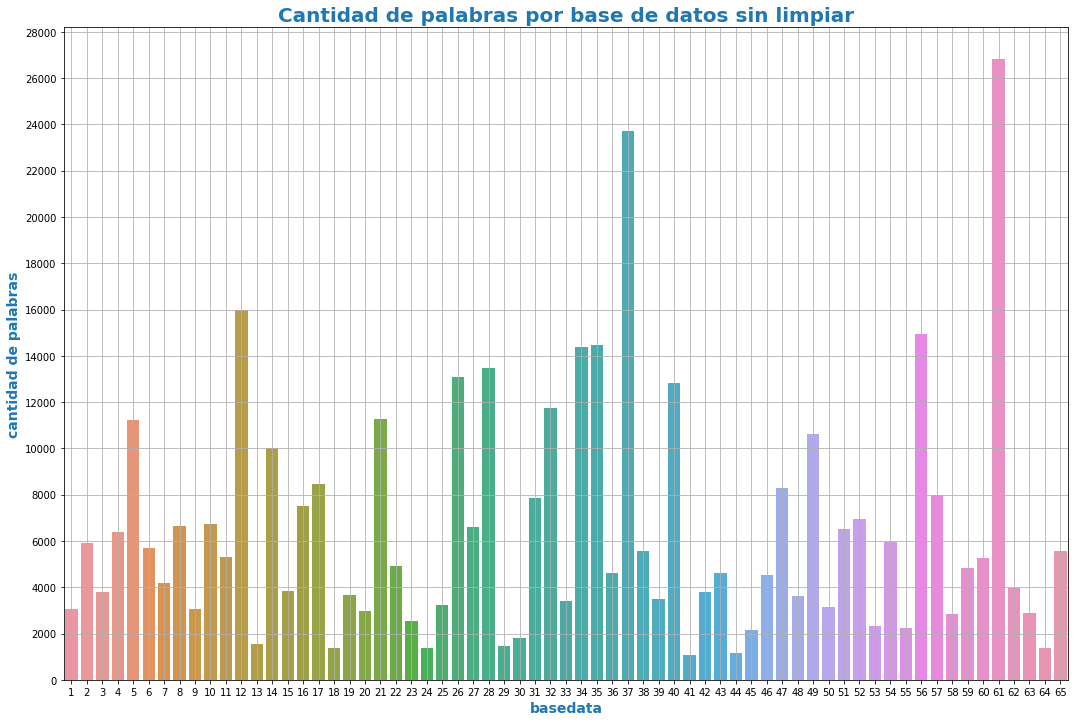

In [46]:
print(len(list_string))
# ahora se mira la cantidad de palabras que tiene cada archivo plano 
quantity_word = []
for data in list_string:
  quantity_word.append(len(data))

df_word = pd.DataFrame(quantity_word, columns=["quantity word"])
# grafica de cantidad de datos  de cadda base de datos 
nums = []
for i in range(1,66):
  nums.append(str(i))
print(quantity_word)
fig, ax = plt.subplots(figsize = (18,12))
#plt.bar(nums,quantity_word)
sns.barplot(nums,quantity_word,x="basedata",y="quantity word")
ax.set_ylabel("cantidad de palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("basedata", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_title('Cantidad de palabras por base de datos sin limpiar', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_yticks(range(0,30000,2000))
plt.grid()
plt.show()

No handles with labels found to put in legend.


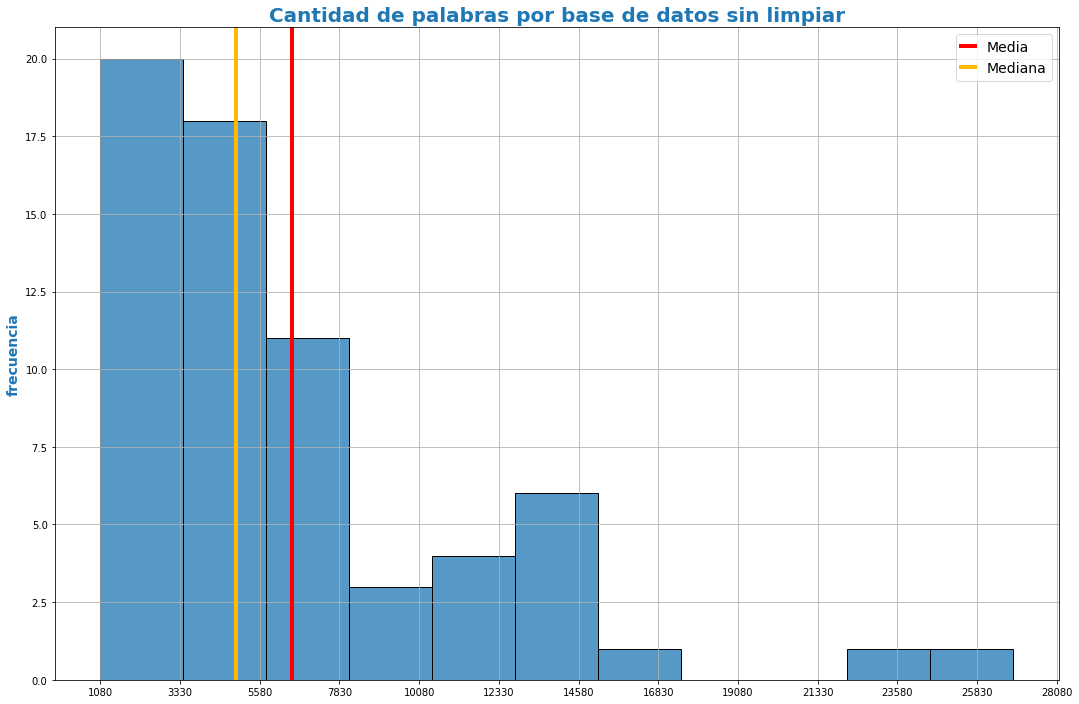

6505.030769230769 4912


In [47]:
# se hace un histograma para la bases de datos 
fig, ax = plt.subplots(figsize = (18,12))
params = {'legend.fontsize': 9.7,'legend.handlelength': 1}
plt.rcParams.update(params)
plt.legend()
sns.histplot(quantity_word,multiple="stack",
    palette="light:m_r")
ax.set_title('Cantidad de palabras por base de datos sin limpiar', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.axvline(x=statistics.mean(quantity_word), color ="red", label = "Media", lw = 4)
ax.axvline(x=statistics.median(quantity_word), color ="#ffba00", label = "Mediana", lw = 4)
ax.grid()
plt.rcParams.update(params)
plt.legend(fontsize = 14)
ax.set_xticks(range(1080,30000,2250))
ax.set_ylabel("frecuencia", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()

print(statistics.mean(quantity_word),statistics.median(quantity_word))


## 3. Recolección inicial de datos:
* Realizar la identificación y unificación de las fuentes de información obtenidas en la recolección de la búsqueda de las     palabras.
* Genere un reporte con la información obtenida de la recolección de los datos

La cantidad de palabras de las bases de datos son: 422827
422827
[2, 10, 2, 2, 9, 3, 8, 4, 2, 5, 2, 10, 5, 2, 9, 3, 9, 3, 10, 3, 9, 5, 5, 2, 10, 1, 8, 2, 10, 8, 1, 11, 2, 10, 8, 1, 10, 16, 2, 11, 1, 13, 2, 10, 3, 4, 5, 2, 15, 4, 8, 3, 2, 5, 2, 9, 3, 11, 6, 4, 8, 8, 9, 1, 17, 11, 2, 7, 2, 3, 11, 9, 2, 2, 4, 8, 2, 10, 7, 5, 3, 14, 13, 1, 8, 9, 5, 1, 12, 1, 2, 8, 7, 1, 10, 2, 10, 3, 11, 8, 10, 8, 3, 7, 3, 9, 1, 10, 2, 10, 5, 3, 11, 3, 13, 8, 10, 3, 6, 12, 3, 1, 3, 7, 2, 11, 5, 2, 7, 9, 2, 8, 7, 11, 1, 6, 2, 9, 10, 1, 11, 25, 11, 2, 7, 4, 10, 10, 1, 3, 10, 9, 3, 13, 3, 6, 2, 3, 10, 3, 13, 9, 1, 2, 13, 1, 1, 3, 14, 2, 12, 7, 4, 20, 12, 9, 2, 11, 3, 5, 5, 4, 2, 3, 1, 6, 2, 5, 3, 9, 5, 5, 6, 2, 10, 1, 5, 11, 7, 7, 12, 8, 1, 4, 3, 13, 13, 7, 2, 4, 18, 2, 3, 9, 3, 8, 8, 17, 2, 9, 2, 2, 10, 13, 2, 8, 8, 5, 3, 11, 2, 4, 2, 9, 2, 10, 3, 10, 19, 2, 4, 2, 6, 2, 10, 3, 11, 11, 2, 7, 16, 10, 8, 8, 7, 10, 2, 8, 1, 8, 2, 2, 10, 3, 5, 4, 6, 11, 10, 1, 2, 5, 5, 7, 8, 6, 2, 9, 3, 11, 10, 7, 2, 8, 2, 7, 1, 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


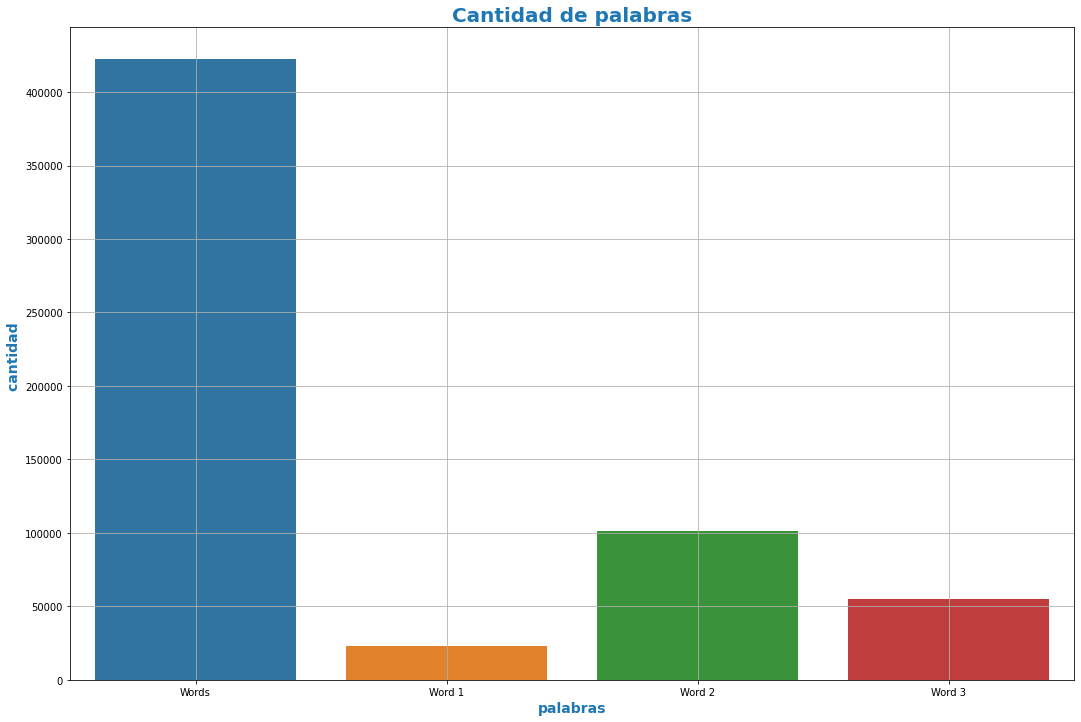

In [48]:
# total de las palabras 
print("La cantidad de palabras de las bases de datos son:",sum(df_word.iloc[:,0]))
df = pd.DataFrame(list_string)
len_words = []
aux_len = []
for base_data in list_string:
  for L in base_data:
    len_words.append(len(L))
print(len(len_words)) 
print(len_words)
print(len(list_string[0][1]))

print("Se contraron palabras con una letra: ",len_words.count(1),"dos letras: ", len_words.count(2),"y tres letras: ", len_words.count(3))
print("total de stop words: ", len_words.count(1)+len_words.count(2)+len_words.count(3))
# se grafica los datos de palabras 
fig, ax = plt.subplots(figsize = (18,12))
#plt.bar(nums,quantity_word)
sns.barplot(["Words","Word 1","Word 2","Word 3"],[sum(df_word.iloc[:,0]),len_words.count(1),len_words.count(2),len_words.count(3)],x="simbolos",y="quantity word")
ax.set_ylabel("cantidad ", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_title('Cantidad de palabras', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
#ax.set_yticks(range(0,60000,2000))
ax.grid()
plt.show()


## busqueda de simbolos

In [49]:
# se agregan todos los archivos a un solo txt para limpiarse 

with open("/content/drive/MyDrive/reto/raw_texts/new-file.txt", "w") as new_file:
    for name in dir:
        with open("/content/drive/MyDrive/reto/raw_texts/"+ name) as f:
            for line in f:
                new_file.write(line)
with open("/content/drive/MyDrive/reto/raw_texts/new-file.txt", "r") as T_file:
  data = T_file.read()
#simbolos correspodientes a otros alfabetos
others = r"\ʿ|\¯|\•|\𐀊|ת|\ł|\£|\ˈ|\…|\−|ס \|’ \|ב\| ׂ\ |𐤏|\ Λ|\ὴ|\⋅|\л|\–|\ש|\Γ|\Θ|\נ|\— |\ⵉ|\ ن |  ד\| |\ צ  |\ἡ|\ ג |\Δ|\ ³|\ ἴ|\ ð | \ מ |\ḥ |\ἑ |\ὶ  |\² |\ר |\´| \δ|\ּ |\ș| \π |\ŋ|כ|\′|\ⴼ|\𐀀|\ β|\ ק | \─ |\ː|\Π |\Đ|\𒀸 |\ י |\\ | \ׁ |\♭|\Ð|\ ί|\ ی\| ק | \ç|\ş|\±|ا|\ř |\ ְ|\ ָ|\ ִ|\ צ|\ȟ| \ζ|\đ|\λ| \ר|\ ּ|\ ֵ|\š| ن\| פ\| י |\ß|\ʔ |\ø|\─| \³| \א |  \и  |― |\ώ |\¨ |ر\ |ׂ\| ד\| מ| \β|τ|έ|χ|η|α|ἰ|σ|θ|τ|ι|ή|ι|κ|ά|ε|ὖ|ρ|ο|ς|ὤ|ψ|φ|ś|ز|ù|א ا|Ō|ח|ὰ|𐤐|ἱ|Φ|ὸ|ם| ی|þ|Ä|ῆ|ō|ê|Ł|ἅ| ְ| ⵔ|ὕ|ô|Σ|ī|ל| ה |צ |ἡ| ג|Δ|ί |¨ | 𐤓 |Å| ָ|ï|…  − ס |’ |ב| ׂ |𐤏  |Λ  |ὴ |⋅ |л |– |ש |Γ |Θ | נ |—|ṓ|ⵉ|ṃ汉|字|羅|巴|𒋗|漢|洲|𒍮|歐|𐀹|𒉿"
print("la cantidad de saltos de linea: ",len(re.findall("\n",data)))
print("la cantidad de simbolo —: ",len(re.findall("\—",data)))
print("la cantidad de retorno de carro: ",len(re.findall("\r",data)))
print("la cantidad de puntos: ",len(re.findall("\.",data)))
print("la cantidad de dos puntos: ",len(re.findall(":",data)))
print("la cantidad de corchetes [ ]: ",len(re.findall("\[",data))+len(re.findall("\]",data)))
print("la cantidad de parentesis ( ) : ",len(re.findall("\(",data))+len(re.findall("\)",data)))
print("la cantidad de llaves { } : ",len(re.findall("\{",data))+len(re.findall("\}",data)))
print("la cantidad de numeros: ",len(re.findall("\d",data)))
print("la cantidad de espacio de anchura cero: ",len(re.findall("\u200b",data)))
print("la cantidad de simbolo !: ",len(re.findall("\!",data)))
print("la cantidad de simbolo ¡: ",len(re.findall("\¡",data)))
print("la cantidad de simbolo ?: ",len(re.findall("\?",data)))
print("la cantidad de simbolo ¿: ",len(re.findall("\¿",data)))
print("la cantidad de simbolo -: ",len(re.findall("\-",data)))
print("la cantidad de simbolo _: ",len(re.findall("\_",data)))
print("la cantidad de simbolo ,: ",len(re.findall("\,",data)))
print("la cantidad de simbolo ;: ",len(re.findall("\;",data)))
print("la cantidad de simbolo \": ",len(re.findall("\"",data)))
print("la cantidad de simbolo \': ",len(re.findall("\'",data)))
print("la cantidad de simbolo \#: ",len(re.findall("\#",data)))
print("la cantidad de simbolo \$: ",len(re.findall("\$",data)))
print("la cantidad de simbolo \%: ",len(re.findall("\%",data)))
print("la cantidad de simbolo \&: ",len(re.findall("\&",data)))
print("la cantidad de simbolo \/: ",len(re.findall("\/",data)))
print("la cantidad de simbolo \=: ",len(re.findall("\=",data)))
print("la cantidad de simbolo *: ",len(re.findall("\*",data)))
print("la cantidad de simbolo +: ",len(re.findall("\+",data)))
print("la cantidad de simbolo ^: ",len(re.findall("\^",data)))
print("la cantidad de simbolo º: ",len(re.findall("\º",data)))
print("la cantidad de simbolo <>: ",len(re.findall("<|>",data)))
print("la cantidad de simbolo ~: ",len(re.findall("~",data)))
print("la cantidad de simbolo « »: ",len(re.findall("«|»",data)))
print("la cantidad de  otros simbolos: ",len(re.findall(others,data)))
print("la cantidad de palabras que tiene almenos una letra mayuscula: ",len(re.findall("[A-ZÑ]+",data)))
print("la cantidad de palabras que tiene mas de dos  letras mayusculas: ",len(re.findall(r"\w*[A-Z]\w*[A-Z]\w*",data)))
#se hace una grafica de barras para ver el comportamiento len_words.count(1),len_words.count(2),len_words.count(3),
data_clear = ["\\n",".",":","[]","()","{}","0-9","\\u200b","!","¡","?","¿","-","_",",",";","\"","\'","#","$","%","&","/","=","*","+","^","º","<>","~","« »","otro","may",">2 May"]
quanty = [len(re.findall("\n",data)),len(re.findall("\.",data)),len(re.findall(":",data)),(len(re.findall("\[",data))+len(re.findall("\]",data))),
          (len(re.findall("\(",data))+len(re.findall("\)",data))),(len(re.findall("\{",data))+len(re.findall("\}",data))),len(re.findall("\d",data)),
          len(re.findall("\u200b",data)),len(re.findall("\!",data)),len(re.findall("\¡",data)),len(re.findall("\?",data)),len(re.findall("\¿",data)),
          len(re.findall("\-",data)),len(re.findall("\_",data)),len(re.findall("\,",data)),len(re.findall("\;",data)),len(re.findall("\"",data)),
          len(re.findall("\'",data)),len(re.findall("\#",data)),len(re.findall("\$",data)),len(re.findall("\%",data)),len(re.findall("\&",data)),
          len(re.findall("/",data)),len(re.findall("=",data)),len(re.findall("\*",data)),len(re.findall("\+",data)),len(re.findall("\^",data)),
          len(re.findall("\º",data)),len(re.findall("<|>",data)),len(re.findall("~",data)),len(re.findall("«|»",data)),
          len(re.findall(others,data)),len(re.findall("[A-ZÑ]+",data)),len(re.findall(r"\w*[A-Z]\w*[A-Z]\w*",data))]
print(quanty)


la cantidad de saltos de linea:  11077
la cantidad de simbolo —:  339
la cantidad de retorno de carro:  0
la cantidad de puntos:  16383
la cantidad de dos puntos:  1222
la cantidad de corchetes [ ]:  10118
la cantidad de parentesis ( ) :  6797
la cantidad de llaves { } :  200
la cantidad de numeros:  37018
la cantidad de espacio de anchura cero:  4931
la cantidad de simbolo !:  16
la cantidad de simbolo ¡:  10
la cantidad de simbolo ?:  35
la cantidad de simbolo ¿:  34
la cantidad de simbolo -:  926
la cantidad de simbolo _:  21
la cantidad de simbolo ,:  29003
la cantidad de simbolo ;:  914
la cantidad de simbolo ":  1076
la cantidad de simbolo ':  163
la cantidad de simbolo \#:  1
la cantidad de simbolo \$:  16
la cantidad de simbolo \%:  499
la cantidad de simbolo \&:  29
la cantidad de simbolo \/:  86
la cantidad de simbolo \=:  32
la cantidad de simbolo *:  23
la cantidad de simbolo +:  24
la cantidad de simbolo ^:  26
la cantidad de simbolo º:  182
la cantidad de simbolo <>:  16


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


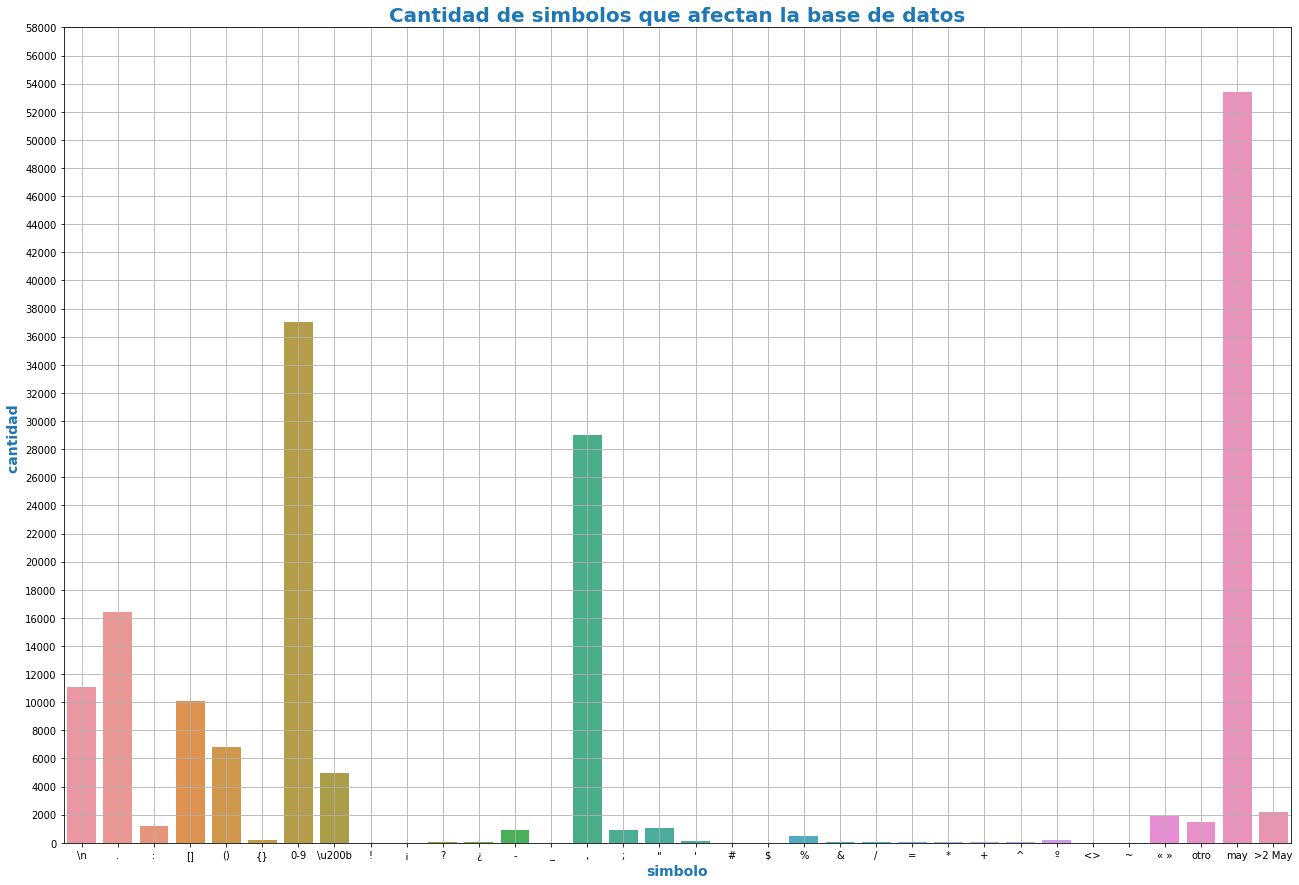

In [50]:
fig, ax = plt.subplots(figsize = (22,15))
#plt.bar(nums,quantity_word)
sns.barplot(data_clear,quanty,x="simbolos",y="quantity word")
ax.set_ylabel("cantidad ", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("simbolo", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_title('Cantidad de simbolos que afectan la base de datos', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_yticks(range(0,60000,2000))
ax.grid()
plt.show()

## **Limpieza de datos** 

In [51]:
#clear = ["\n","\.",":","\[|\]","\(|\)","\{|}","\d","\u200b","!","¡","\?","¿","-","_",",",";","\"","\'","#","$","%","&","/","=","*","+","^","º","<|>","~","«|»","τ|έ|χ|η|α|ἰ|σ|θ|τ|ι|ή|ι|κ|ά|ε|ὖ|ρ|ο|ς|ὤ|ψ"]
print(' '.join(set(data)),"tamaño:",len(' '.join(set(data))))
data = re.sub(r"\n","",data)
data = re.sub(r"\—|\–"," ",data)
data = re.sub(r"\°"," ",data)
data = re.sub(r"\u200b"," ",data)
data = re.sub(r"\["," ",data)
data = re.sub(r"]"," ",data)
data = re.sub(r":|ː"," ",data)
data = re.sub(r"\."," ",data)
data = re.sub(r"\{"," ",data)
data = re.sub(r"}"," ",data)
data = re.sub(r"\("," ",data)
data = re.sub(r"\)"," ",data)
data = re.sub(r"\d"," ",data)
data = re.sub(r"\'"," ",data)
data = re.sub(r","," ",data)
data = re.sub(r";"," ",data)
data = re.sub(r","," ",data)
data = re.sub(r"!"," ",data)
data = re.sub(r"¡"," ",data)
data = re.sub(r"\?"," ",data)
data = re.sub(r"¿"," ",data)
data = re.sub(r"-"," ",data)
data = re.sub(r"_"," ",data)
data = re.sub(r"\""," ",data)
data = re.sub(r"\'"," ",data)
data = re.sub(r"#|♯"," ",data)
data = re.sub(r"\$"," ",data)
data = re.sub(r"&"," ",data)
data = re.sub(r"%"," ",data)
data = re.sub(r"/"," ",data)
data = re.sub(r"="," ",data)
data = re.sub(r"\*"," ",data)
data = re.sub(r"\+"," ",data)
data = re.sub(r"\^"," ",data)
data = re.sub(r"º"," ",data)
data = re.sub(r"<|>"," ",data)
data = re.sub(r"~"," ",data)
data = re.sub(r"«|»"," ",data)
data = re.sub(r"\xa0","",data)
data = re.sub(r"\‘|\’","",data) 
data = re.sub(r"\“|\”","",data)
data = re.sub(r"\|"," ",data)
data = re.sub(r"\\"," ",data)
data = re.sub(r"\u200e"," ",data)
data = re.sub(r"\w*[A-Z]\w*[A-Z]\w*"," ",data)

r κ ï Θ ὸ œ ز ē 7 ל ¯ 𐤏 è n   w ( ἰ Ō Å δ о ὴ Ν η á 巴 Χ U t Ó ź 𒍮 ± ν ș é . ” • 3 j ? л m Ο ר ח ִ W ˈ ἅ ü > ת θ ω ξ כ î ö 𐀯 o פ ū S Ὀ ř ὁ u Т P Λ ا ד ã φ ῦ ῖ º ה T ì ♭ ί ἴ έ Φ H 歐 ł ] ȟ π ª ם ─ ṓ â ṇ 羅 " K 
 ὰ ‘ ḥ k ′ ώ p ^ ι v ý ی ā נ ♯ ; י [ 𐀹 ṣ B Н – ὖ : F ⵉ Ἰ ن g » 漢 ⋅ а 𒀸 ت к ŋ ς ê b £ ô Ł ὤ ὐ * μ 𐤐 Ι ⵔ ṃ ä Κ ð ָ 𒋗 X 𒉿 z Δ e Ä с ¿ ³ ) = Ú & ο Έ C ש υ V λ _ ב 字 , ɾ - 𐀊 ַ i ψ M ḗ ύ 汉 ù ζ ë ὶ ׁ ç E χ Z Η ò c ¡ 1 O … ו | א d q ό Τ ś ’ à Á ī ρ Β Μ Đ ⴼ č ὺ ְ ῆ ‎ ε < מ ἑ N ή þ h A ː Ζ ἱ / D « ú и σ 𐀀 š 4 ס ! \ ἐ ß Q ῶ ² ק ş ر L æ û ά ° ĭ ג   е ó 8 ּ − 洲 í G ō f { l I “ 5 τ ἡ ὕ Í β a — Υ پ ʔ ~ s + ' Ἐ ñ 9 𐤓 ​ ― α Π × 6 % Ε ć צ y J ¨ ʿ ø γ Γ ע } ´ Y € Σ đ Α R 0 # É x 2 𒀀 ׂ ֵ $ ὅ Ἑ tamaño: 685


In [52]:
print("la cantidad de saltos de linea: ",len(re.findall("\n",data)))
print("la cantidad de simbolo —: ",len(re.findall("\—",data)))
print("la cantidad de simbolo °: ",len(re.findall("°",data)))
print("la cantidad de puntos: ",len(re.findall("\.",data)))
print("la cantidad de dos puntos: ",len(re.findall(":",data)))
print("la cantidad de corchetes [ ]: ",len(re.findall("\[",data))+len(re.findall("\]",data)))
print("la cantidad de parentesis ( ) : ",len(re.findall("\(",data))+len(re.findall("\)",data)))
print("la cantidad de llaves { } : ",len(re.findall("\{",data))+len(re.findall("\}",data)))
print("la cantidad de numeros: ",len(re.findall("\d",data)))
print("la cantidad de espacio de anchura cero: ",len(re.findall("\u200b",data)))
print("la cantidad de simbolo !: ",len(re.findall("\!",data)))
print("la cantidad de simbolo ¡: ",len(re.findall("\¡",data)))
print("la cantidad de simbolo ?: ",len(re.findall("\?",data)))
print("la cantidad de simbolo ¿: ",len(re.findall("\¿",data)))
print("la cantidad de simbolo -: ",len(re.findall("\-",data)))
print("la cantidad de simbolo _: ",len(re.findall("\_",data)))
print("la cantidad de simbolo ,: ",len(re.findall("\,",data)))
print("la cantidad de simbolo ;: ",len(re.findall("\;",data)))
print("la cantidad de simbolo \": ",len(re.findall("\"",data)))
print("la cantidad de simbolo \': ",len(re.findall("\'",data)))
print("la cantidad de simbolo \#: ",len(re.findall("\#",data)))
print("la cantidad de simbolo \$: ",len(re.findall("\$",data)))
print("la cantidad de simbolo \%: ",len(re.findall("\%",data)))
print("la cantidad de simbolo \&: ",len(re.findall("\&",data)))
print("la cantidad de simbolo \/: ",len(re.findall("\/",data)))
print("la cantidad de simbolo \=: ",len(re.findall("\=",data)))
print("la cantidad de simbolo *: ",len(re.findall("\*",data)))
print("la cantidad de simbolo +: ",len(re.findall("\+",data)))
print("la cantidad de simbolo ^: ",len(re.findall("\^",data)))
print("la cantidad de simbolo º: ",len(re.findall("\º",data)))
print("la cantidad de simbolo <>: ",len(re.findall("<|>",data)))
print("la cantidad de simbolo ~: ",len(re.findall("~",data)))
print("la cantidad de simbolo « »: ",len(re.findall("«|»",data)))
print("la cantidad de simbolo griegos: ",len(re.findall("τ|έ|χ|η|α|ἰ|σ|θ|τ|ι|ή|ι|κ|ά|ε|ὖ|ρ|ο|ς|ὤ|ψ",data)))
print("la cantidad de palabras que tiene almenos una letra mayuscula: ",len(re.findall("[A-ZÑ]+",data)))
print("la cantidad de palabras que tiene mas de dos  letras mayusculas: ",len(re.findall(r"\w*[A-Z]\w*[A-Z]\w*",data)))


la cantidad de saltos de linea:  0
la cantidad de simbolo —:  0
la cantidad de simbolo °:  0
la cantidad de puntos:  0
la cantidad de dos puntos:  0
la cantidad de corchetes [ ]:  0
la cantidad de parentesis ( ) :  0
la cantidad de llaves { } :  0
la cantidad de numeros:  0
la cantidad de espacio de anchura cero:  0
la cantidad de simbolo !:  0
la cantidad de simbolo ¡:  0
la cantidad de simbolo ?:  0
la cantidad de simbolo ¿:  0
la cantidad de simbolo -:  0
la cantidad de simbolo _:  0
la cantidad de simbolo ,:  0
la cantidad de simbolo ;:  0
la cantidad de simbolo ":  0
la cantidad de simbolo ':  0
la cantidad de simbolo \#:  0
la cantidad de simbolo \$:  0
la cantidad de simbolo \%:  0
la cantidad de simbolo \&:  0
la cantidad de simbolo \/:  0
la cantidad de simbolo \=:  0
la cantidad de simbolo *:  0
la cantidad de simbolo +:  0
la cantidad de simbolo ^:  0
la cantidad de simbolo º:  0
la cantidad de simbolo <>:  0
la cantidad de simbolo ~:  0
la cantidad de simbolo « »:  0
la can

## eliminación de las stop words y palabras con tildes

In [53]:
nltk.download('stopwords')
print("\n-------------------------------------------------------------------\n")
stop_words = stopwords.words('spanish')
print(stop_words)
stop_words_cap = []
for word in stop_words:
  stop_words_cap.append(word.capitalize())
# se agrega las stop words en capitilizads en un solo arreglo
stop_words = stop_words + stop_words_cap
# se elimina las stopwords 
def delate_stopwords(txt, stopwords):
    return ' '.join([word for word in txt.split(' ') if word not in stopwords])
data = delate_stopwords(data,stop_words)
# se quita las tildes 

a,b = 'áéíóúÁÉÍÓÚ','aeiouAEIOU'
trans = str.maketrans(a,b)
data = data.translate(trans)
print(len(re.split(" ",data)))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

-------------------------------------------------------------------

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'su

In [54]:
# se busca las palabras repetidas y se eliminan
# la funcion debe recibir una lista para esto se recomienda usar la librería re
def remove_repeated_words(text):
    ulist = []
    # se agregan las palbras si estas no estan en la lista
    [ulist.append(word) for word in text if word not in ulist]
    return ' '.join(ulist)
data = remove_repeated_words(re.split(" ", data))
print(len(re.split(" ",data)))
def remove_words(text):
  list_data = []
  for word in text:
    if len(word)>3:
      list_data.append(word)
  return ' '.join(list_data)
data = remove_words(re.split(" ", data))
print(len(re.split(" ",data)))
#print(re.split(" ", data))
data = data.lower()
data

35840
35191


'aeropuerto aerodromo terminal viaje transporte aereo aeronave funciones variadas aterrizaje despegue aeronaves embarque desembarque pasajeros equipaje mercancia reabastecimiento combustible mantenimiento lugar estacionamiento aquellas servicio aeropuertos sirven aviacion militar comercial general dividen partes area definida tierra incluye todas edificaciones instalaciones equipos destinado total parcialmente llegada partida movimiento aquellos aerodromos publicos cuentan servicios intensidad justifiquen denominacion aquellos vuelos provenientes destino extranjero presten sanidad aduana migraciones denominan internacionales helipuertos definen destinados utilizados solamente helicopteros aplicables disposiciones relativas clasificacion procedimientos autorizacion vigente hidroaviones aterrizan superficies agua tales lagos forma necesitan tener zonas libres obstaculos aguas tranquilas existen anfibios amerizan portaaviones ejemplo base aerea helipuerto cataratas niagara ontario canada 

In [55]:
print(len(re.split(" ",data)))
new_stop_word = ["usted","Ello"]
data = delate_stopwords(data,new_stop_word)
print(len(re.split(" ",data)))


35191
35190


In [56]:
# se busca los simbolos raros
new_data = ' '.join(set(data))
print(len(re.split(" ",new_data)))
print("simbolos a borrar :",re.split(" ",new_data))
letters_abc = sorted(re.findall(r"[a-zñ]",new_data),reverse=True)
print(sorted(re.findall(r"[a-zñ]",new_data),reverse=True))
# se buscan las palabras que tiene acentos  para ser eliminadas 
other_simbol = delate_stopwords(new_data,re.findall(r"[a-zñ]",new_data))
print("otras palabras",other_simbol)
# la funcion debe recibir dos arreglos! 
# text es el contenido que se quire mirar 
# accents son las letras que tiene palabras y se quieren eliminar
def delate_words_accents(text,accents):
  list_data = []
  flang = 0
  cont = 0
  for word in text:
    for i in word:
      if i in accents:
        cont += 1
        flang = 1
        break
      else:
        flang = 0
    if(flang == 0):
      list_data.append(word)
  print("canditdad de palabras eliminadas: ",cont)
  return ' '.join(list_data)

data = delate_words_accents(re.split(" ",data),other_simbol)
print(len(re.split(" ",data)))
data

196
simbolos a borrar : ['š', 'ῖ', 'и', 'r', 'ס', 'ה', 'κ', 'ï', 'ἐ', 'ß', 'ì', 'ש', 'ί', 'ἴ', 'υ', 'έ', 'œ', 'ز', 'ē', 'λ', 'ק', '歐', 'ş', 'ב', 'ر', 'æ', 'ł', 'ל', 'û', 'ά', 'è', 'ɾ', 'n', 'ȟ', 'ĭ', 'π', 'w', 'ג', '', '', 'ם', 'ἰ', '𐀊', 'е', '─', 'ṓ', 'ַ', 'â', 'ṇ', 'i', '羅', 'ψ', 'ּ', '−', '洲', 'ὰ', 'δ', 'ḥ', 'о', 'ὴ', 'k', 'ḗ', 'ō', 'f', 'η', 'ύ', 'ώ', 'ù', 'p', 'ζ', 'ι', 'v', 'ý', 'ë', 'ὶ', 'ی', 'l', 'ā', 'ׁ', 'נ', 'ç', 'י', '𐀹', '巴', 'χ', 'ὖ', 't', 'τ', 'ὕ', 'ò', 'c', 'ⵉ', '…', 'ו', 'β', 'ⵔ', 'ن', 'ź', 'a', 'g', 'א', 'н', '⋅', 'а', 'ν', 'پ', 'd', 'ʔ', 'ت', 's', 'q', 'ș', 'к', 'ŋ', 'ς', 'ό', 'ê', 'ñ', 'ś', 'j', 'b', 'à', 'ὀ', 'л', 'm', '―', 'α', 'т', 'ô', 'ī', 'ρ', 'ὐ', 'ר', 'ć', 'צ', 'ח', 'μ', 'å', 'y', 'ⴼ', 'ִ', 'ˈ', '¨', 'ʿ', 'ἅ', 'č', 'ü', 'ְ', 'ṃ', 'ä', 'ῆ', 'γ', 'ת', 'ὺ', 'ø', 'θ', 'ð', 'ω', 'ξ', 'ε', 'ָ', 'כ', 'î', 'ö', '𐀯', 'ע', 'z', 'o', 'פ', 'מ', '´', 'e', 'ἑ', 'с', 'ū', 'ή', '³', 'đ', 'þ', 'h', 'ř', 'ὁ', 'ῦ', 'u', 'x', 'ἱ', 'ׂ', 'ا', 'ֵ', 'ד', 'ã', 'ὅ', 'σ', 'ο', 'φ', '𐀀

'aeropuerto aerodromo terminal viaje transporte aereo aeronave funciones variadas aterrizaje despegue aeronaves embarque desembarque pasajeros equipaje mercancia reabastecimiento combustible mantenimiento lugar estacionamiento aquellas servicio aeropuertos sirven aviacion militar comercial general dividen partes area definida tierra incluye todas edificaciones instalaciones equipos destinado total parcialmente llegada partida movimiento aquellos aerodromos publicos cuentan servicios intensidad justifiquen denominacion aquellos vuelos provenientes destino extranjero presten sanidad aduana migraciones denominan internacionales helipuertos definen destinados utilizados solamente helicopteros aplicables disposiciones relativas clasificacion procedimientos autorizacion vigente hidroaviones aterrizan superficies agua tales lagos forma necesitan tener zonas libres obstaculos aguas tranquilas existen anfibios amerizan portaaviones ejemplo base aerea helipuerto cataratas niagara ontario canada 

## data clear

In [57]:
with open("/content/drive/MyDrive/reto/raw_texts/new_file_clear.txt", "w") as file_clear:
  file_clear.write(data)


## 4.Medidas de tendencia central:
* Determinar la media, moda y mediana de las longitudes de caracteres de las palabras disponibles. Adicionalmente puede realizar análisis de tendencia central en otras variables si lo desea.



In [58]:
df = pd.DataFrame(re.split(" ",data), columns=["palabras"])
def calculate_size_word(textdf):
  data = []
  for word in textdf:
    data.append(len(word))
  return data

size_word = calculate_size_word(df.iloc[:,0])
df['tamaño'] = size_word
df

palabras  tamaño
0        aeropuerto      10
1         aerodromo       9
2          terminal       8
3             viaje       5
4        transporte      10
...             ...     ...
34810    libreville      10
34811        rosira       6
34812      recitado       8
34813  complementen      12
34814       ndjembe       7

[34815 rows x 2 columns]

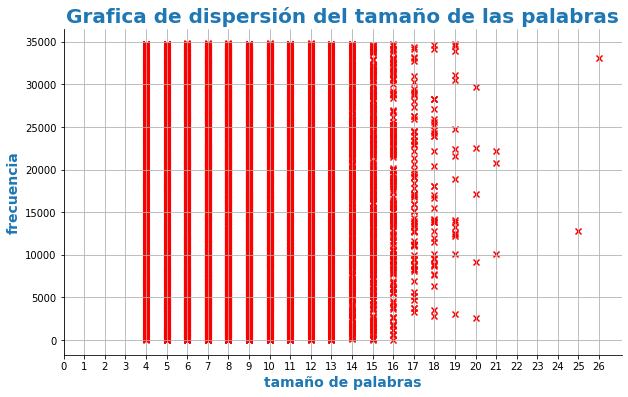

In [59]:
fig, ax = plt.subplots(figsize = (10,6))
sns.despine(fig)
ax.scatter(df.iloc[:,1],[range(len(df.iloc[:,1]))],marker = "x",color = "red")
ax.set_title('Grafica de dispersión del tamaño de las palabras', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.grid()
ax.set_xticks(range(0,27,1))
#ax.set_yticks(range(0,35500,2000))
ax.set_xlabel("tamaño de palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("frecuencia", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()


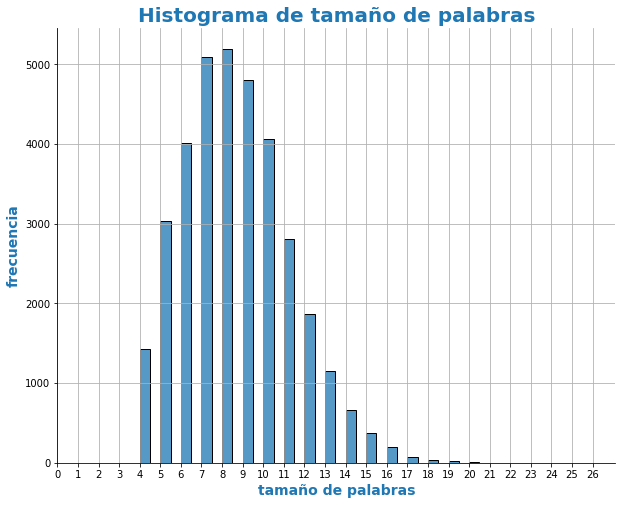

In [60]:
# se hace un histograma para la bases de datos 
fig, ax = plt.subplots(figsize = (10,8))
sns.despine(fig)
sns.histplot(df.iloc[:,1],binwidth=0.5)
ax.set_title('Histograma de tamaño de palabras', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.grid()
ax.set_xticks(range(0,27,1))
ax.set_xlabel("tamaño de palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("frecuencia", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
plt.show()


In [61]:
# Se calcula la media mediana y modosa 
size_mean = df["tamaño"].mean()
size_median = df["tamaño"].median()
size_mode = df["tamaño"].mode()

print("media :",size_mean)
print("mediana :",size_median)
print("moda: ",size_mode)

media : 8.464110297285652
mediana : 8.0
moda:  0    8
dtype: int64


No handles with labels found to put in legend.


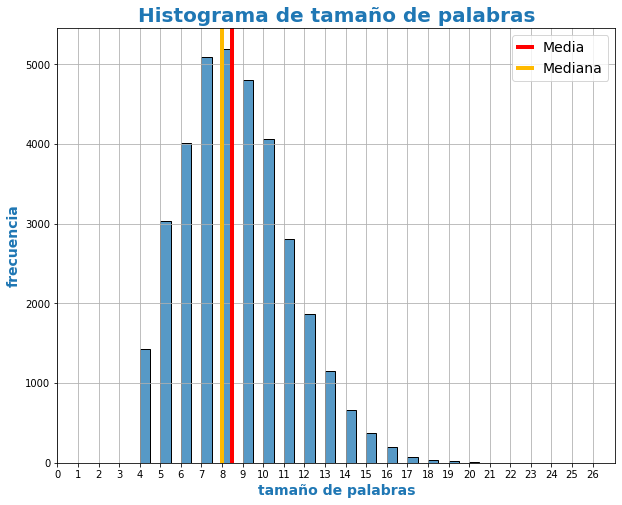

In [62]:
#se grafica los datos de tendencia central
fig, ax = plt.subplots(figsize = (10,8))
params = {'legend.fontsize': 9.7,'legend.handlelength': 1}
plt.rcParams.update(params)
plt.legend()
ax.axvline(x=size_mean, color ="red", label = "Media", lw = 4)
ax.axvline(x=size_median, color ="#ffba00", label = "Mediana", lw = 4)
sns.histplot(df.iloc[:,1],binwidth=0.5)
ax.set_title('Histograma de tamaño de palabras', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
plt.rcParams.update(params)
plt.legend(fontsize = 14)
ax.grid()
ax.set_xticks(range(0,27,1))
ax.set_xlabel("tamaño de palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("frecuencia", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

plt.show()


In [63]:
# Se mira la letras de abcdario
print("letras: ",letters_abc)
def repeat_letter_word(text,letters):
  data = []
  cont = 0
  cont_2 = 0
  for L in letters:
    for word in text:
      for i in word:
        if L == i:
          cont += 1
      data.append(cont)
      cont = 0
    df[L] = data # df es un data frame externo
    data.clear()
  return data


repeat_letter_word(df["palabras"],letters_abc)
df


letras:  ['ñ', 'z', 'y', 'x', 'w', 'v', 'u', 't', 's', 'r', 'q', 'p', 'o', 'n', 'm', 'l', 'k', 'j', 'i', 'h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']


palabras  tamaño  ñ  z  y  x  w  v  u  t  ...  j  i  h  g  f  e  d  \
0        aeropuerto      10  0  0  0  0  0  0  1  1  ...  0  0  0  0  0  2  0   
1         aerodromo       9  0  0  0  0  0  0  0  0  ...  0  0  0  0  0  1  1   
2          terminal       8  0  0  0  0  0  0  0  1  ...  0  1  0  0  0  1  0   
3             viaje       5  0  0  0  0  0  1  0  0  ...  1  1  0  0  0  1  0   
4        transporte      10  0  0  0  0  0  0  0  2  ...  0  0  0  0  0  1  0   
...             ...     ... .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. ..   
34810    libreville      10  0  0  0  0  0  1  0  0  ...  0  2  0  0  0  2  0   
34811        rosira       6  0  0  0  0  0  0  0  0  ...  0  1  0  0  0  0  0   
34812      recitado       8  0  0  0  0  0  0  0  1  ...  0  1  0  0  0  1  1   
34813  complementen      12  0  0  0  0  0  0  0  1  ...  0  0  0  0  0  3  0   
34814       ndjembe       7  0  0  0  0  0  0  0  0  ...  1  0  0  0  0  2  1   

       c  b  a  
0      0  0  1  
1      0  0  1  
2      0  0  1  
3      0  0  1  
4      0  0  1  
...   .. .. ..  
34810  0  1  0  
34811  0  0  1  
34812  1  0  1  
34813  1  0  0  
34814  0  1  0  

[34815 rows x 29 columns]

[306, 1717, 854, 770, 370, 3597, 8541, 15997, 20811, 22677, 664, 7297, 27307, 21606, 8775, 12181, 759, 1175, 27862, 2522, 4687, 3256, 29424, 12430, 15935, 4887, 38271]
['words', 'ñ', 'z', 'y', 'x', 'w', 'v', 'u', 't', 's', 'r', 'q', 'p', 'o', 'n', 'm', 'l', 'k', 'j', 'i', 'h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


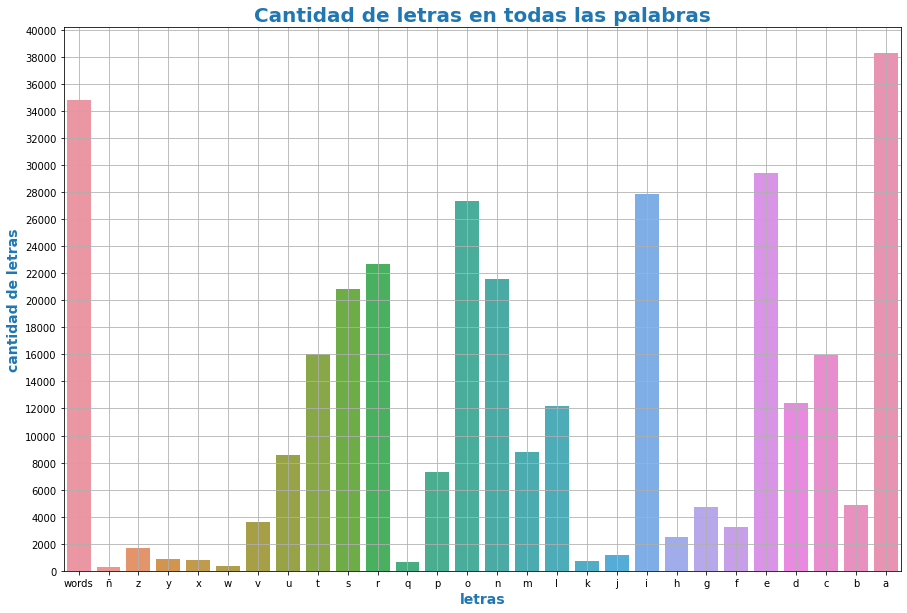

In [64]:
# se grafica
# esta funcion devuelve las cantidas de repeticionesque tiene las las letras 
def calculate_letters(letters):
  data = []
  # se agrega la cnatidad de palabras
  data.append(len(df["palabras"]))
  for L in letters:
    data.append(df[L].sum())
  return data

total_letters = calculate_letters(letters_abc)
names = ["words"]+letters_abc
print(total_letters[1:])
print(names)
# grafica de los datos
fig, ax = plt.subplots(figsize = (15,10))
#plt.bar(nums,quantity_word)
sns.barplot(names,total_letters)
ax.set_ylabel("cantidad de letras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("letras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_title('Cantidad de letras en todas las palabras', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_yticks(range(0,40001,2000))
ax.grid()
plt.show()


## 5. Medidas de posicionamiento estadístico:
* Determinar los cuartiles 1, 2 y 3 y percentil 90 para la distribución de la longitud de las palabras presentadas en el juego.
* Determinar los cuartiles 1, 2 y 3 para la distribución del posicionamiento de cada una de las letras del alfabeto en las palabras presentadas en el juego.

El percentil 90 es:  12.0  El percentil 75:  10.0 El percentil 50: 8.0 El percentil 25: 7.0


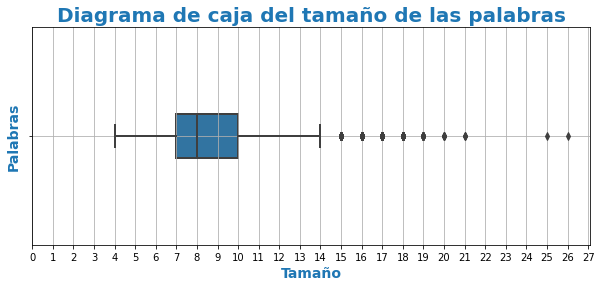

In [65]:
Q9,Q3,Q2,Q1 = np.percentile(df["tamaño"],[90,75,50,25])
print("El percentil 90 es: ", Q9," El percentil 75: ",Q3,"El percentil 50:",Q2,"El percentil 25:",Q1)
#grafica de caja de bigotes
fig, ax = plt.subplots(figsize = (10,4))
#plt.bar(nums,quantity_word)
sns.boxplot(x = df["tamaño"],linewidth=2, width=0.2)
ax.set_ylabel("Palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Tamaño", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_title('Diagrama de caja del tamaño de las palabras', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xticks(range(0,28,1))
ax.grid()
plt.show()

In [66]:
# se hace la matriz para las posiciones 
def positions_letters(data_words,letters):
  matriz_pos = []
  k = 0
  # primer for para todas las letras 
  for i in letters:
    matriz_pos.append([])
    #para las palabras 
    for word in data_words:
      #para las letras
      for j,L in enumerate(word):
        if i == L:
          matriz_pos[k].append(j)
    k+=1#aumenta en uno para agregar en el siguiente renglon  
  return matriz_pos
matriz_pos = positions_letters(df["palabras"],letters_abc)


In [67]:

# ahora se obtiene los percentiles

def percentile(data,letters):
  matriz = []
  for i,letter in enumerate(data):
    Q9,Q3,Q2,Q1 = np.percentile(data[i],[90,75,50,25])
    matriz.append([Q9,Q3,Q2,Q1])
  #mostrar contenido
    print(letters[i],"=","El percentil 90 es: ",Q9," El percentil 75: ",Q3,"El percentil 50:",Q2,"El percentil 25:",Q1)

  return matriz
percen = percentile(matriz_pos, letters_abc )


ñ = El percentil 90 es:  6.0  El percentil 75:  5.0 El percentil 50: 4.0 El percentil 25: 2.0
z = El percentil 90 es:  8.400000000000091  El percentil 75:  7.0 El percentil 50: 5.0 El percentil 25: 3.0
y = El percentil 90 es:  7.0  El percentil 75:  5.0 El percentil 50: 4.0 El percentil 25: 2.0
x = El percentil 90 es:  4.0  El percentil 75:  2.0 El percentil 50: 1.0 El percentil 25: 1.0
w = El percentil 90 es:  5.0  El percentil 75:  4.0 El percentil 50: 2.0 El percentil 25: 0.0
v = El percentil 90 es:  7.0  El percentil 75:  5.0 El percentil 50: 3.0 El percentil 25: 1.0
u = El percentil 90 es:  6.0  El percentil 75:  4.0 El percentil 50: 3.0 El percentil 25: 1.0
t = El percentil 90 es:  8.0  El percentil 75:  6.0 El percentil 50: 4.0 El percentil 25: 2.0
s = El percentil 90 es:  10.0  El percentil 75:  8.0 El percentil 50: 5.0 El percentil 25: 2.0
r = El percentil 90 es:  7.0  El percentil 75:  5.0 El percentil 50: 4.0 El percentil 25: 2.0
q = El percentil 90 es:  5.0  El percentil 75

In [68]:
# graficas de vigotes
def grafic_box(data,letters):
  for i in range(len(data)):
    fig, ax = plt.subplots(figsize = (10,4))
    plt.subplot(ax)
    sns.boxplot( matriz_pos[i],linewidth=2, width=0.2,color="green")
    ax.set_yticklabels(letters[i], fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'}) 
    ax.set_xlabel("posiciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    ax.set_title('Diagrama de caja de: '+letters[i], loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
    ax.grid()
    plt.show()


In [69]:
def grafic_hist(data,letters):
  for i in range(len(data)):
    fig, ax = plt.subplots()
    sns.despine(fig)
    sns.histplot(data[i],binwidth=0.5, color="orange")
    ax.set_title('Histograma de las posiciones de la letra: '+ letters[i], loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
    ax.grid()
    ax.set_xlabel("posiciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    ax.set_ylabel("frecuencia", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    plt.show()


## 6. Medidas de dispersión estadística:
* Determinar el rango, varianza y desviación estándar para la longitud de las palabras presentadas en el banco de palabras.
* Determinar el rango, varianza y desviación estándar para la posición de cada letra dentro de una palabra en el banco de palabras.

In [70]:
# se muestran las medidas de dispersion rango, varianza y desvicaion estandar para el tamaño de las palabras
print("Tamaño palabras:","rango es: ",max(df["tamaño"])-min(df["tamaño"]),"la varianza es: ",statistics.variance(df["tamaño"]),"la desviación estandara es:",statistics.stdev(df["tamaño"]))

Tamaño palabras: rango es:  22 la varianza es:  6.813664210273408 la desviación estandara es: 2.6102996399404814


In [71]:
# se muestran las medidas de dispersion rango, varianza y desvicaion estandar para las posiciones
def measure_dispersion(data,letters):
  matriz = []
  for i, letter in enumerate(data):
    Range = max(letter)-min(letter)
    variance = statistics.variance(letter)
    std_dev = statistics.stdev(letter)
    print(letters[i],"=","rango es: ",Range,"la varianza es: ",variance,"la desviación estandara es:",std_dev)
measure_dispersion(matriz_pos,letters_abc)


ñ = rango es:  12 la varianza es:  3.827150969677488 la desviación estandara es: 1.9563105504181815
z = rango es:  14 la varianza es:  6.773753619705862 la desviación estandara es: 2.6026435829183105
y = rango es:  13 la varianza es:  5.7824141822085435 la desviación estandara es: 2.4046650873268285
x = rango es:  11 la varianza es:  2.479428503875838 la desviación estandara es: 1.5746201141468497
w = rango es:  11 la varianza es:  4.831912400205083 la desviación estandara es: 2.198161140636665
v = rango es:  14 la varianza es:  7.1416708646403215 la desviación estandara es: 2.6723904775762692
u = rango es:  16 la varianza es:  4.548272213351935 la desviación estandara es: 2.1326678628778404
t = rango es:  21 la varianza es:  8.607515384503436 la desviación estandara es: 2.933856742327995
s = rango es:  20 la varianza es:  13.387558182217564 la desviación estandara es: 3.658901226081071
r = rango es:  17 la varianza es:  6.914674418748829 la desviación estandara es: 2.6295768516529097


## 7. Exploración visual de los datos:
* Realizar gráficas que permitan comprender el comportamiento de la longitud de las palabras y la posición de los caracteres en cada una de ellas. Realizar boxplots, scatterplots y gráficas para variables categóricas de ser necesario.
* Realizar el análisis de las gráficas generadas.

### tamaño de las palabras

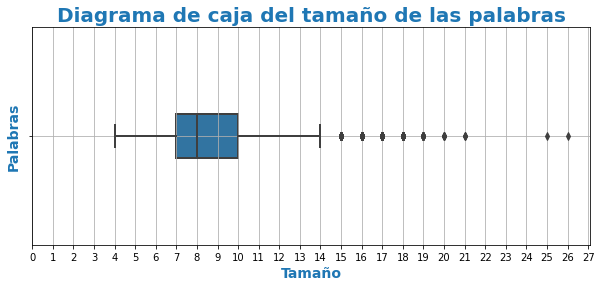

In [72]:
#grafica de caja de bigotes
fig, ax = plt.subplots(figsize = (10,4))
#plt.bar(nums,quantity_word)
sns.boxplot(x = df["tamaño"],linewidth=2, width=0.2)
ax.set_ylabel("Palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xlabel("Tamaño", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_title('Diagrama de caja del tamaño de las palabras', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_xticks(range(0,28,1))
ax.grid()
plt.show()

### posiciones 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


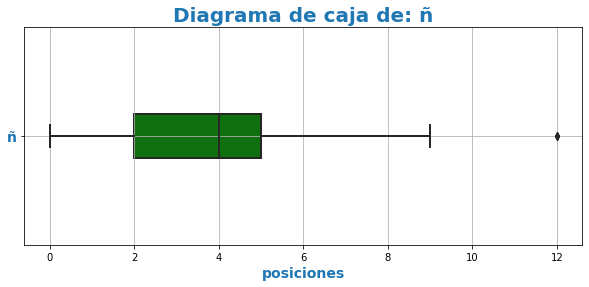

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


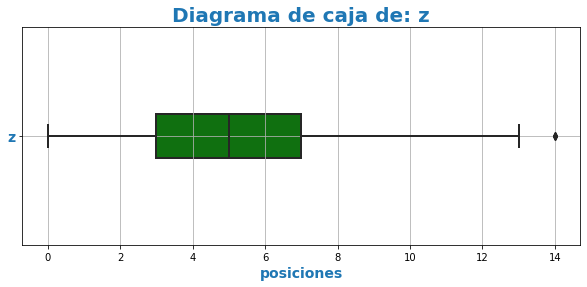

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


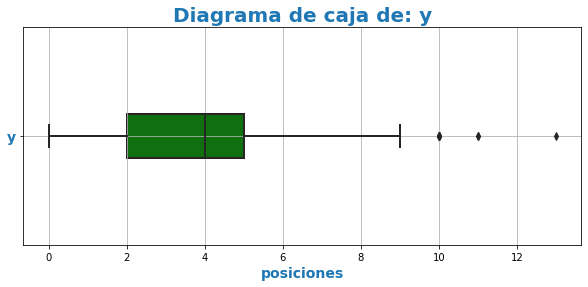

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


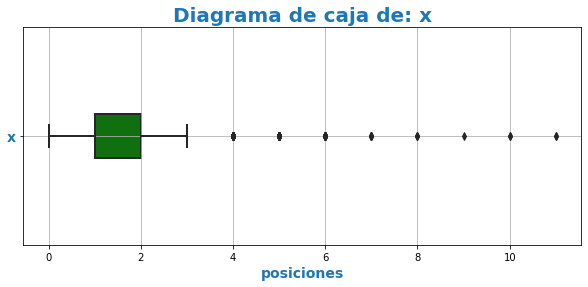

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


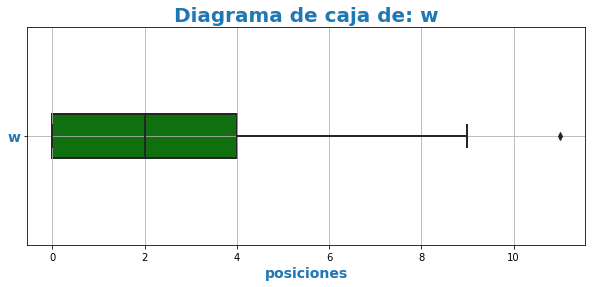

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


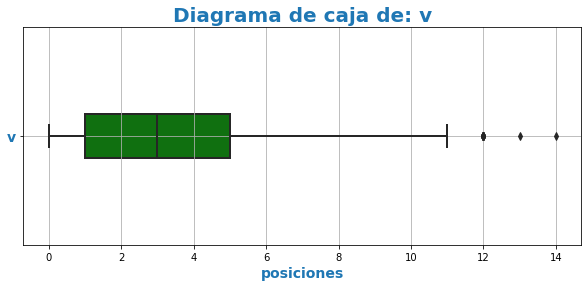

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


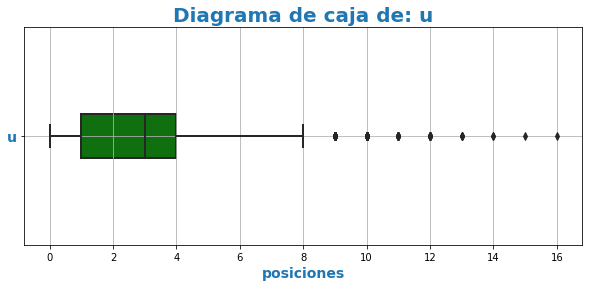

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


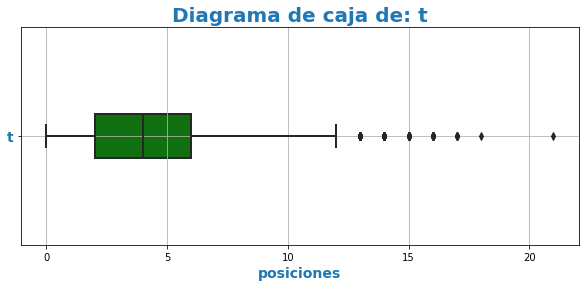

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


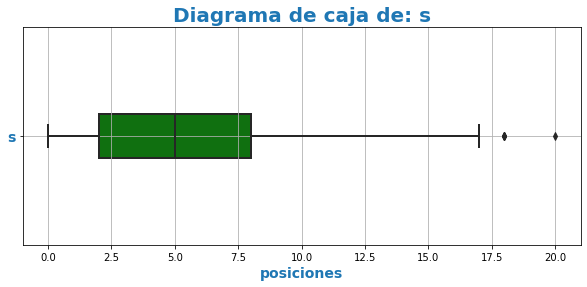

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


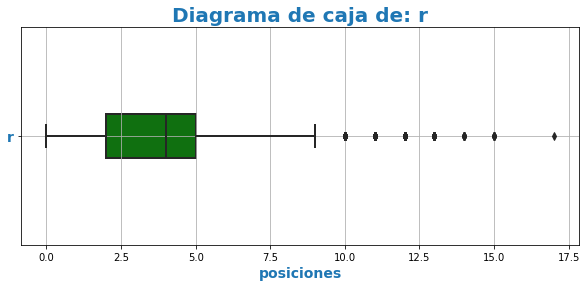

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


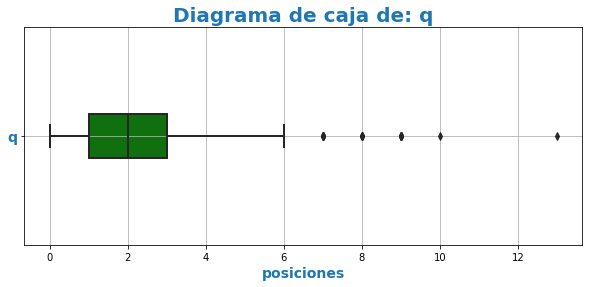

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


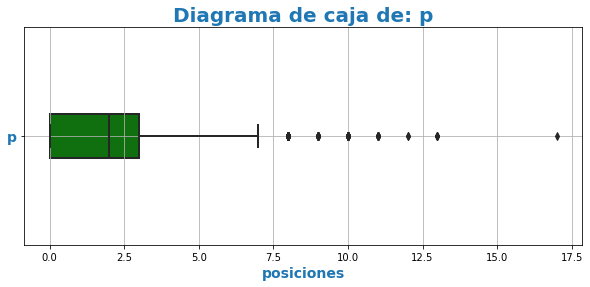

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


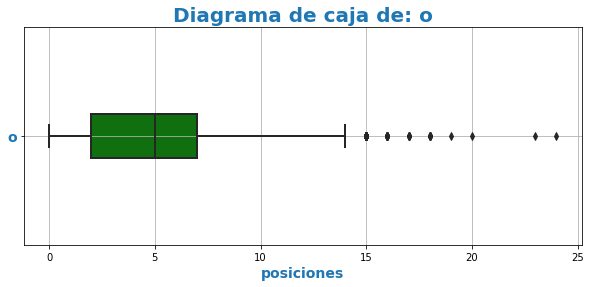

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


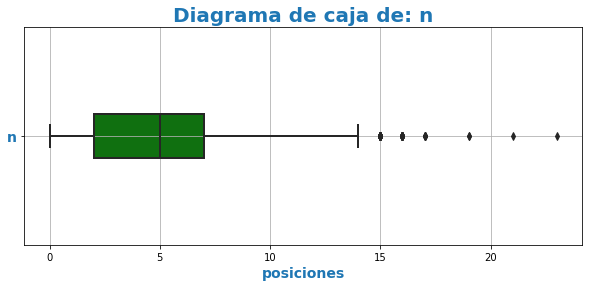

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


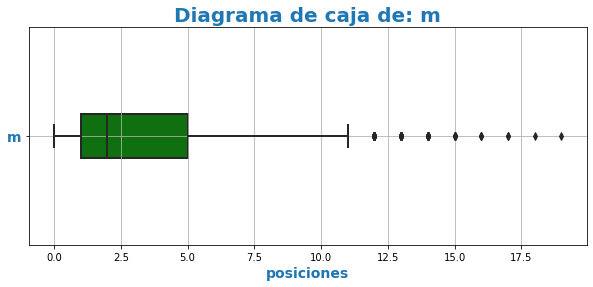

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


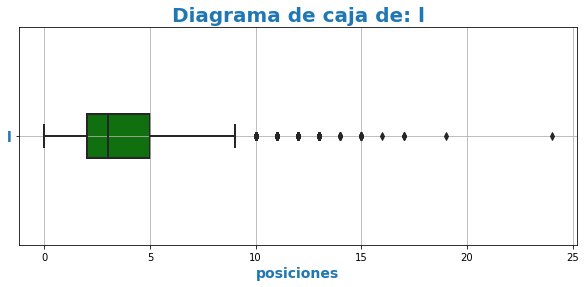

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


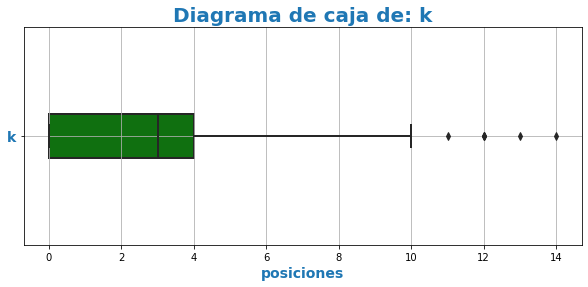

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


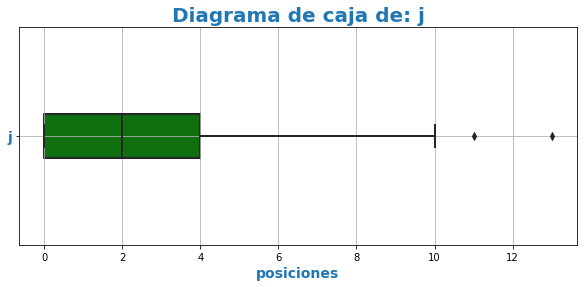

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


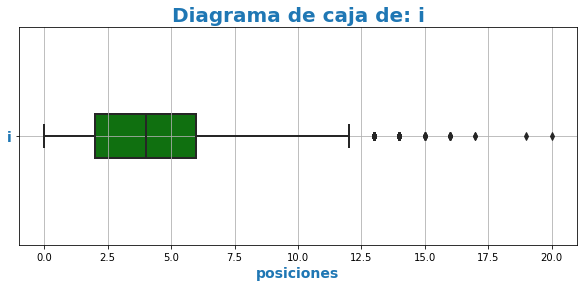

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


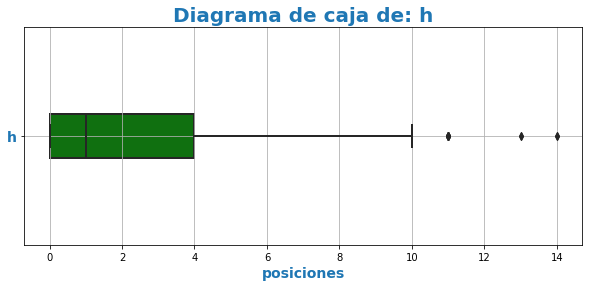

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


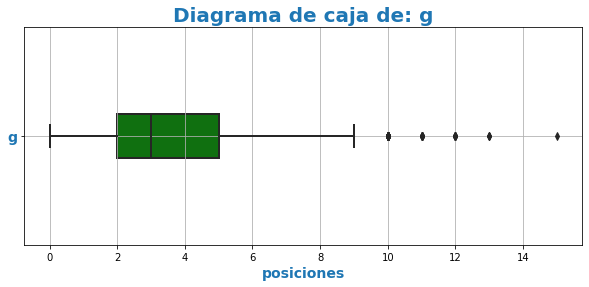

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


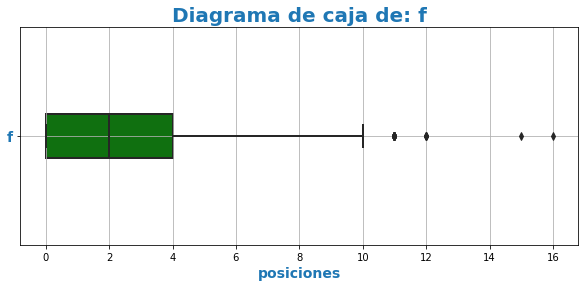

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


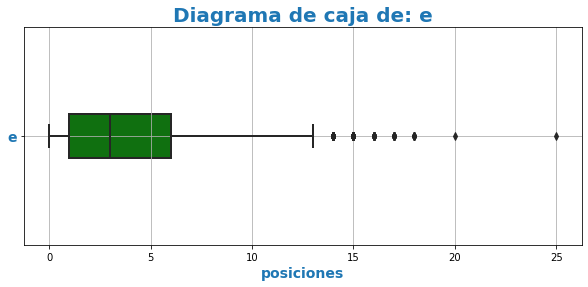

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


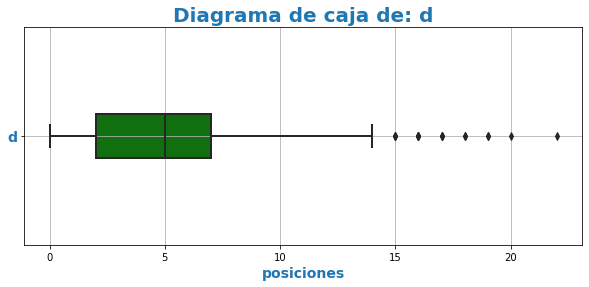

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


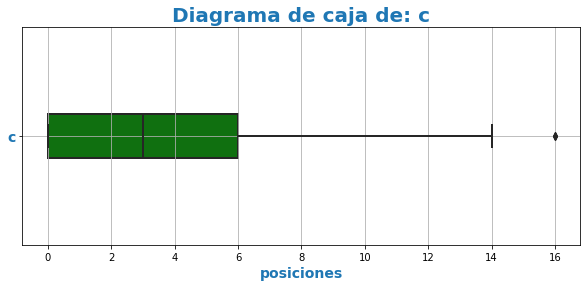

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


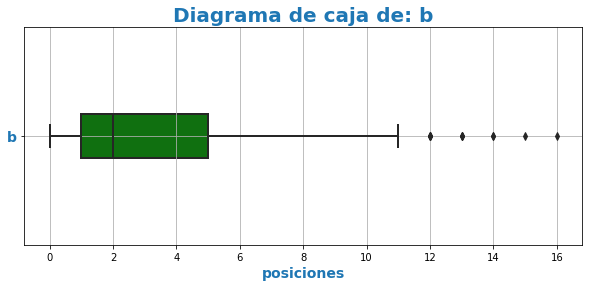

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


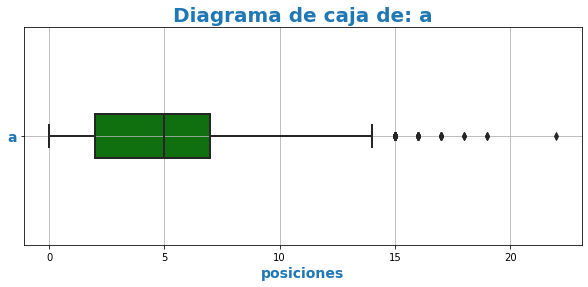

In [73]:
grafic_box(matriz_pos,letters_abc)


## 8. Distribuciones de datos:
* Realizar gráficas de distribución para las longitudes de las palabras presentadas.
* Realizar gráficas de distribución para la posición de un carácter en especifico en cada palabra.
* Realizar el análisis de las gráficas generadas.

### longitud en las palabras 

No handles with labels found to put in legend.


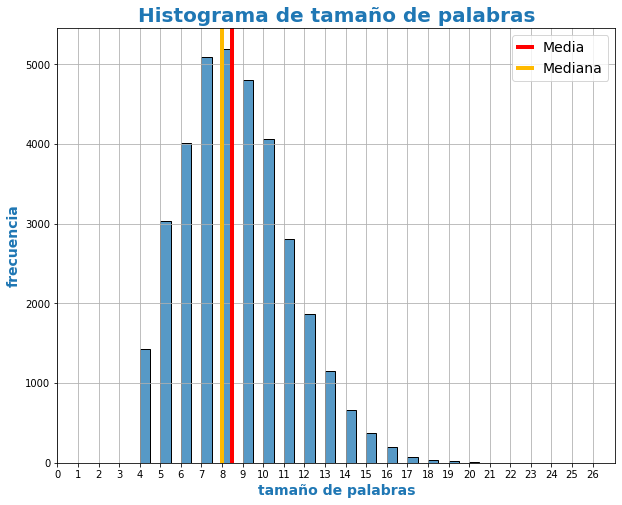

In [74]:
#se grafica los datos de tendencia central
fig, ax = plt.subplots(figsize = (10,8))
params = {'legend.fontsize': 9.7,'legend.handlelength': 1}
plt.rcParams.update(params)
plt.legend()
ax.axvline(x=size_mean, color ="red", label = "Media", lw = 4)
ax.axvline(x=size_median, color ="#ffba00", label = "Mediana", lw = 4)
sns.histplot(df.iloc[:,1],binwidth=0.5)
ax.set_title('Histograma de tamaño de palabras', loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
plt.rcParams.update(params)
plt.legend(fontsize = 14)
ax.grid()
ax.set_xticks(range(0,27,1))
ax.set_xlabel("tamaño de palabras", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
ax.set_ylabel("frecuencia", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})

plt.show()

### posciones

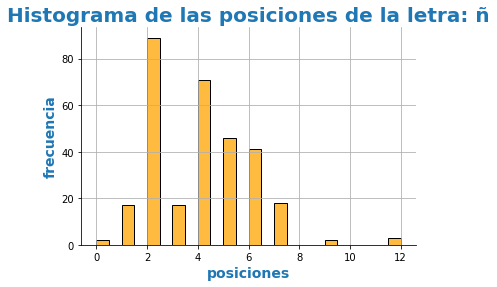

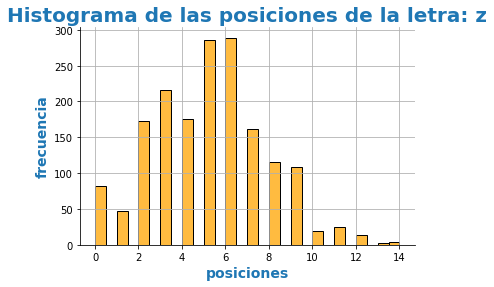

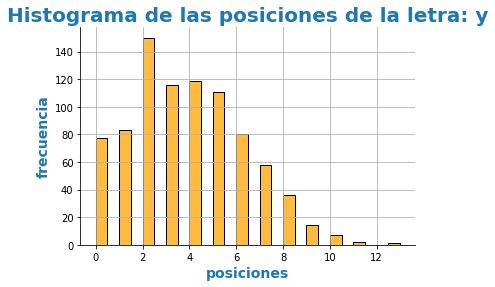

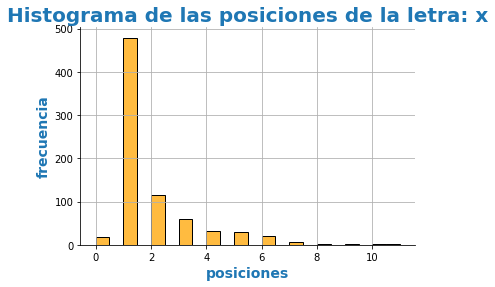

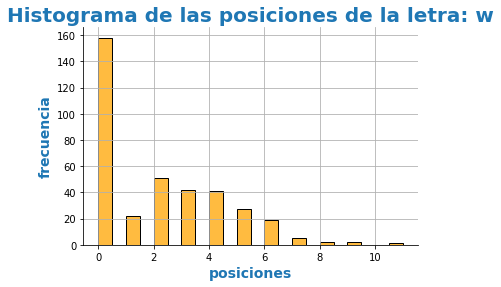

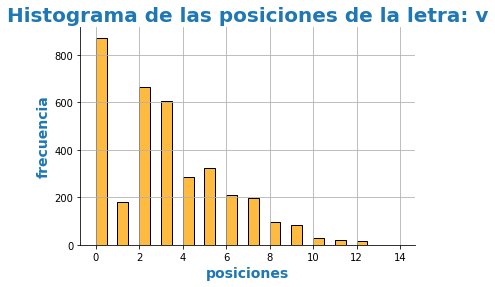

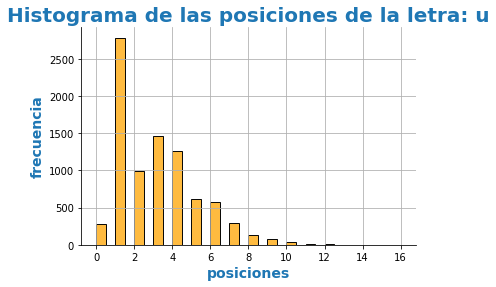

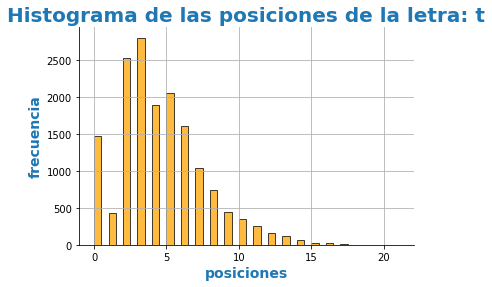

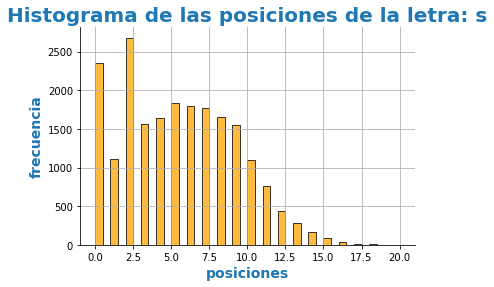

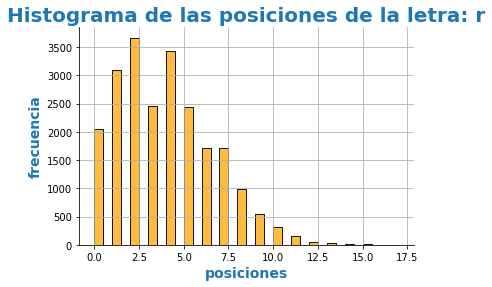

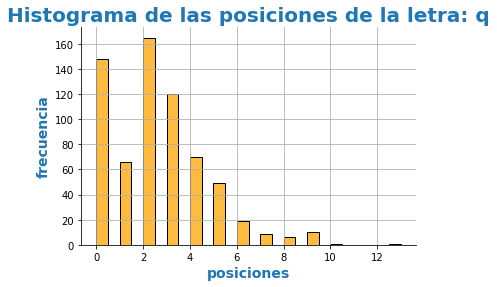

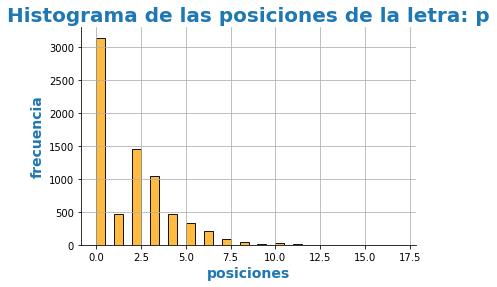

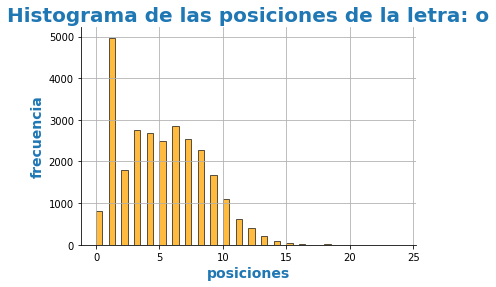

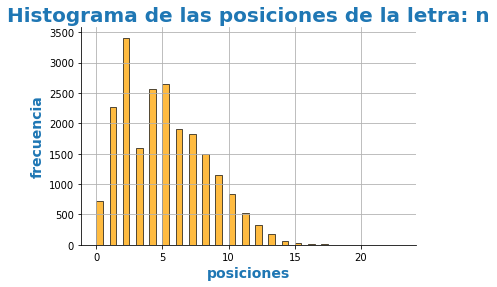

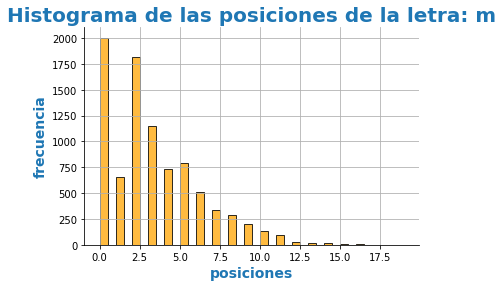

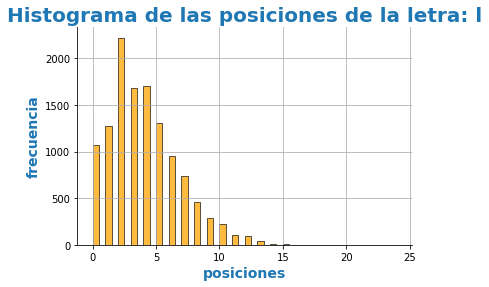

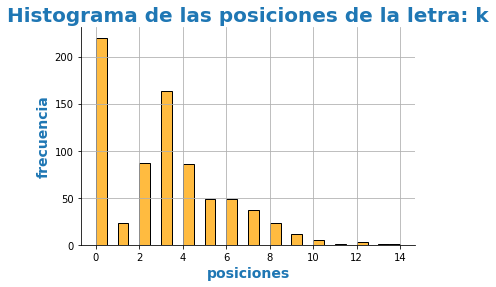

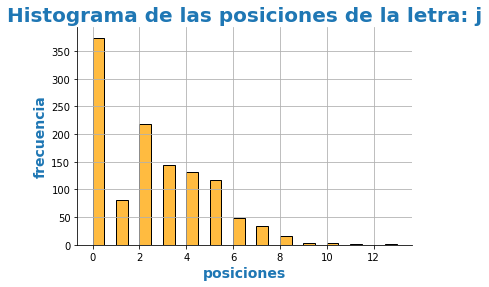

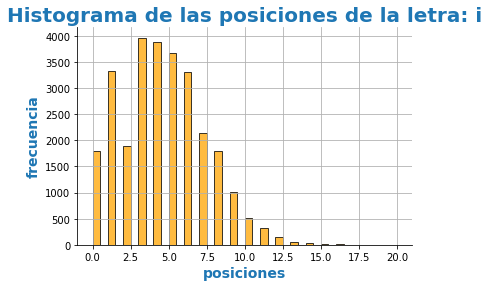

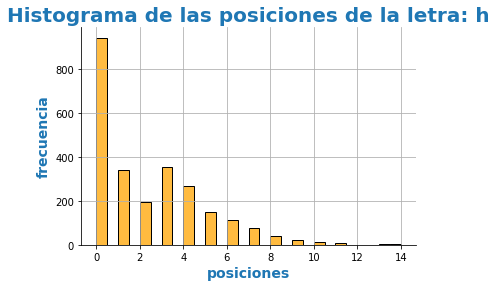

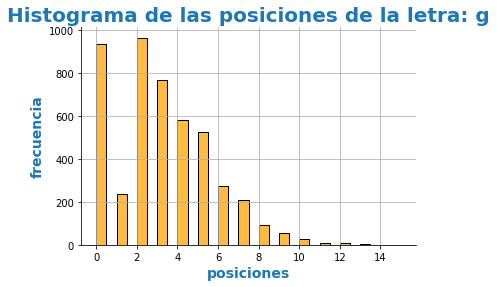

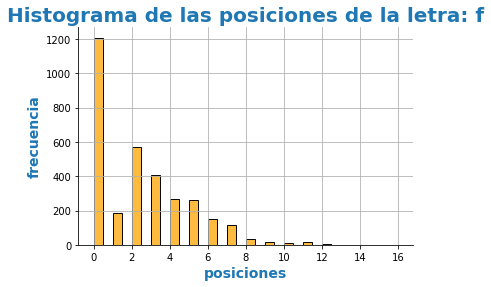

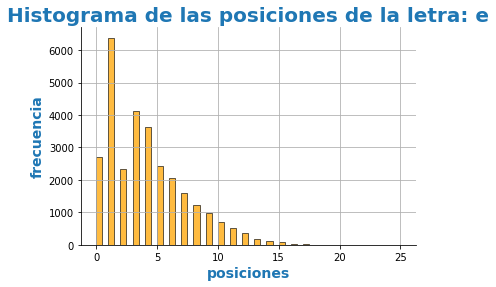

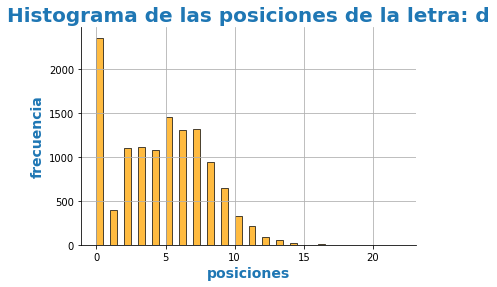

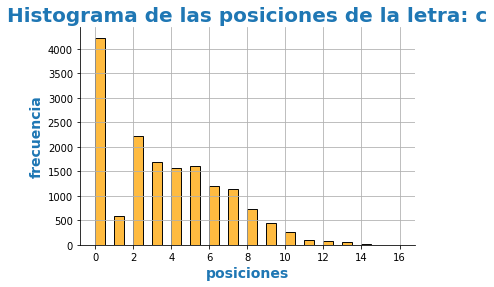

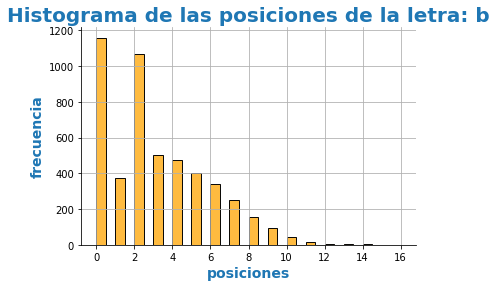

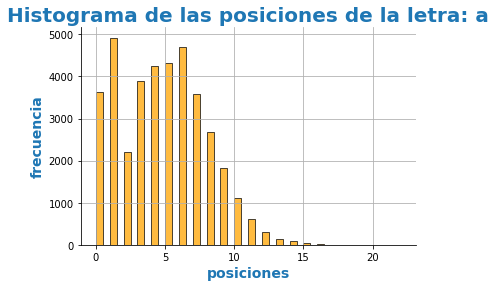

In [75]:
grafic_hist(matriz_pos,letters_abc)

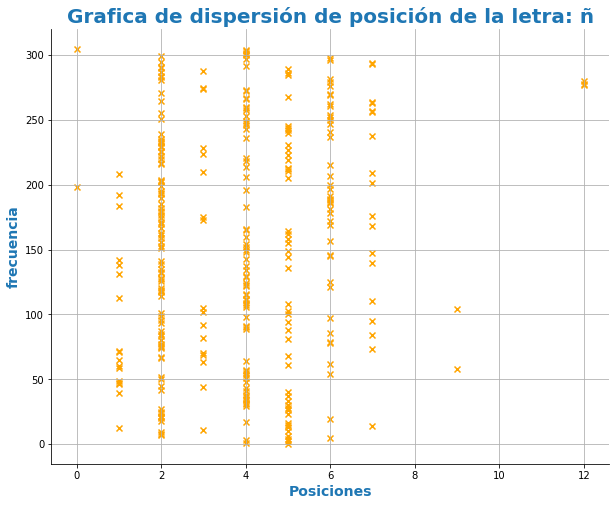

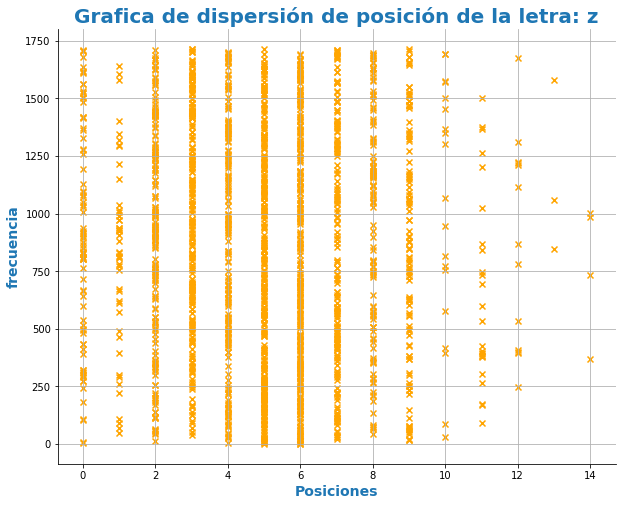

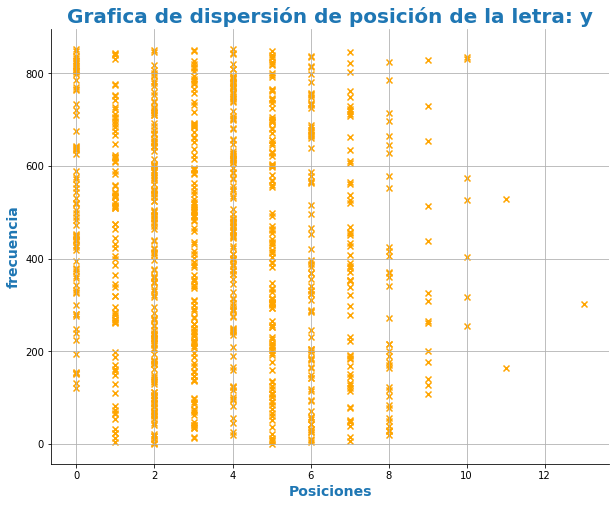

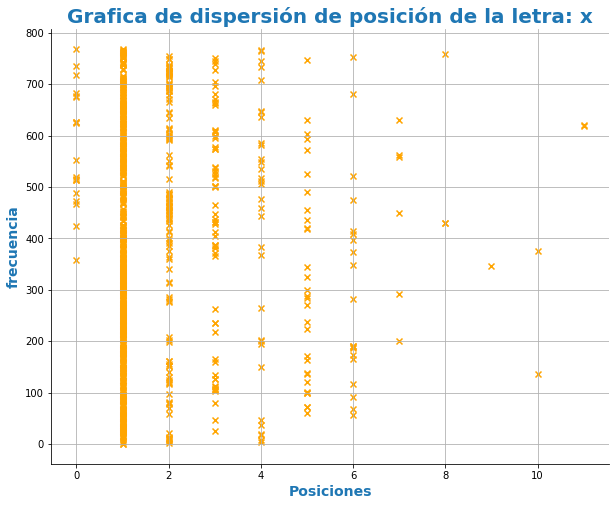

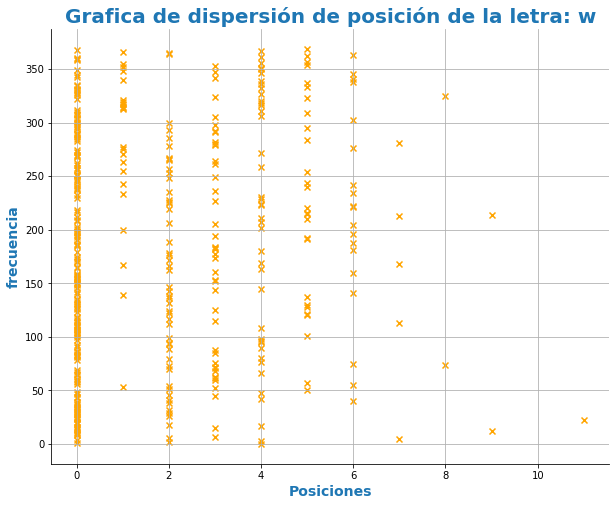

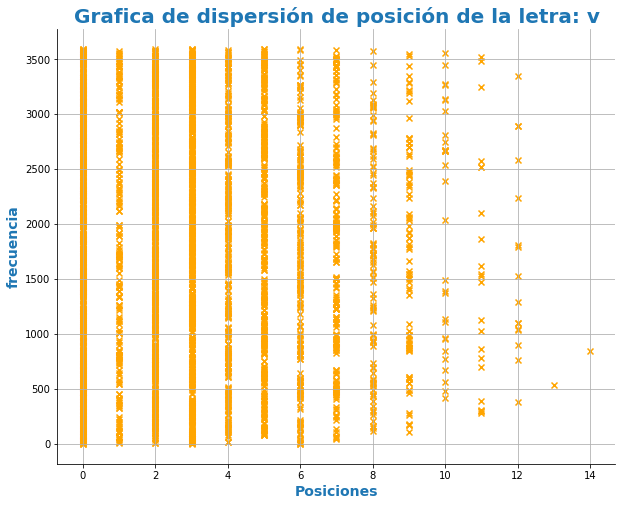

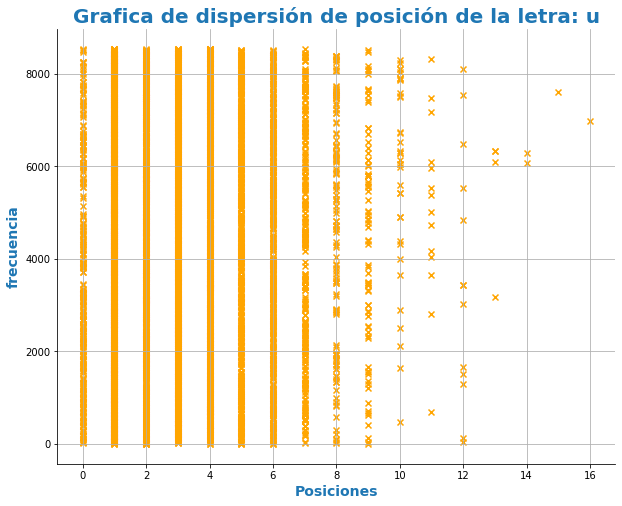

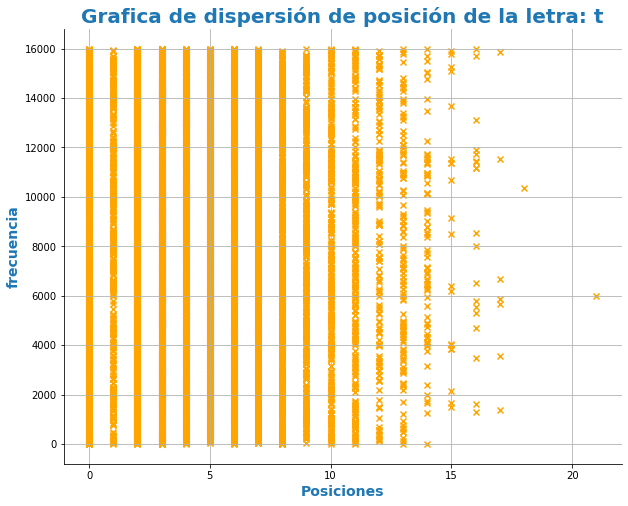

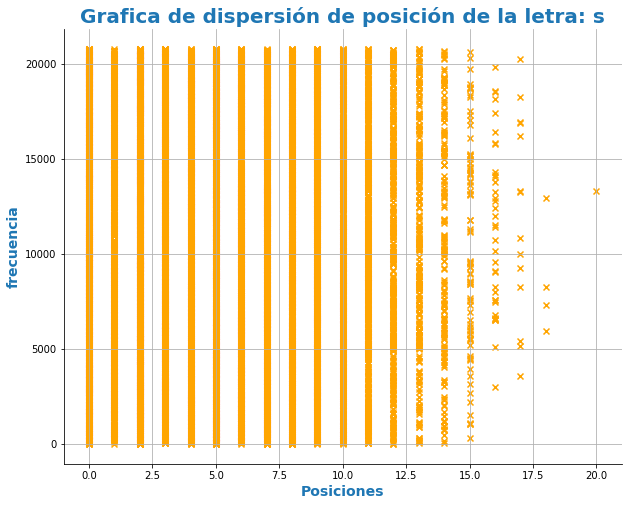

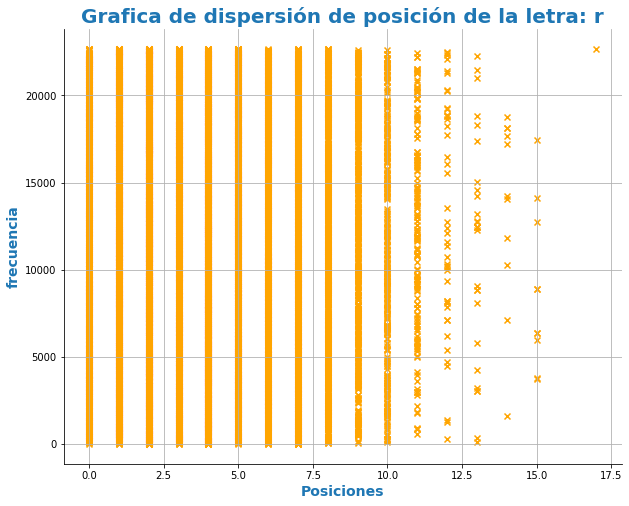

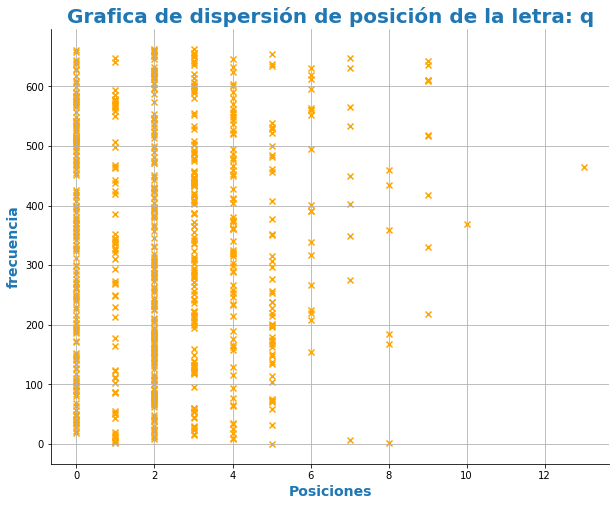

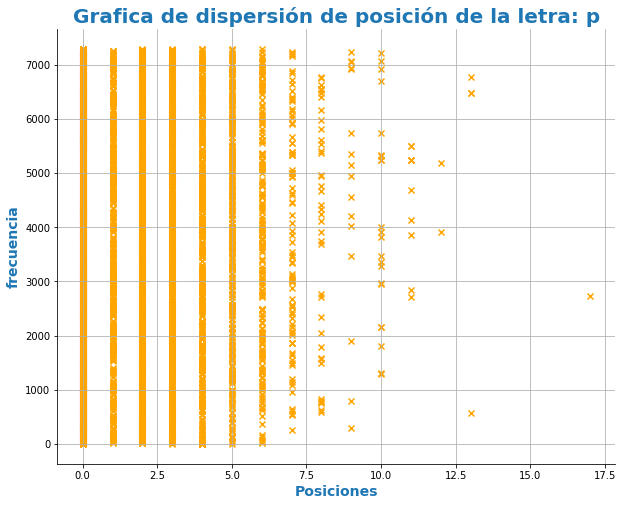

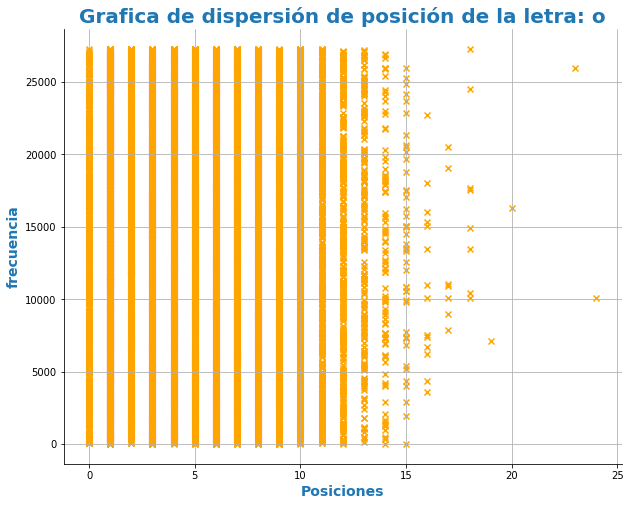

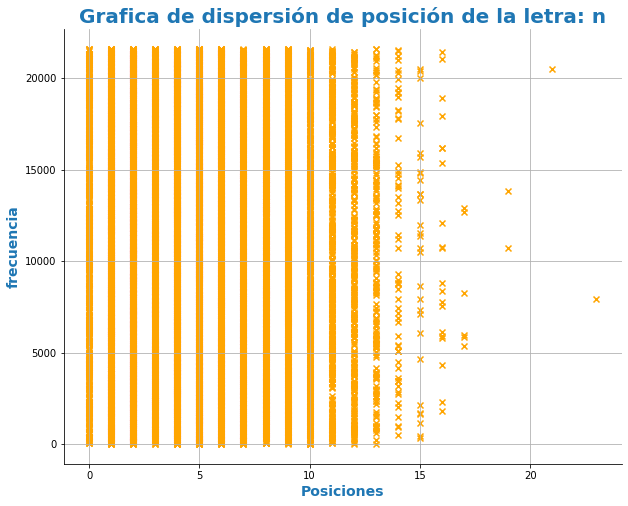

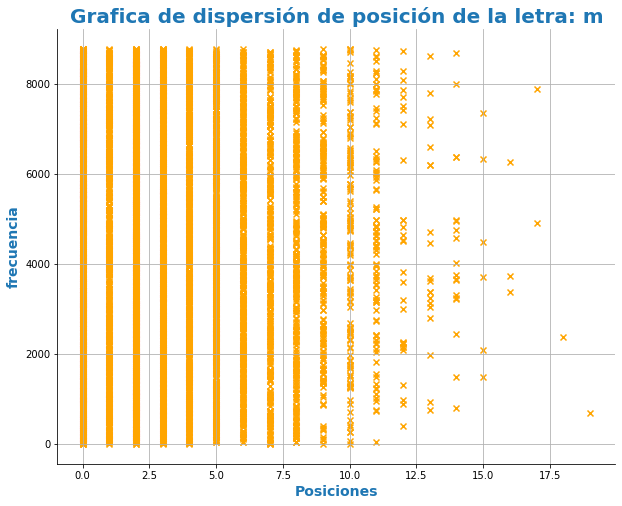

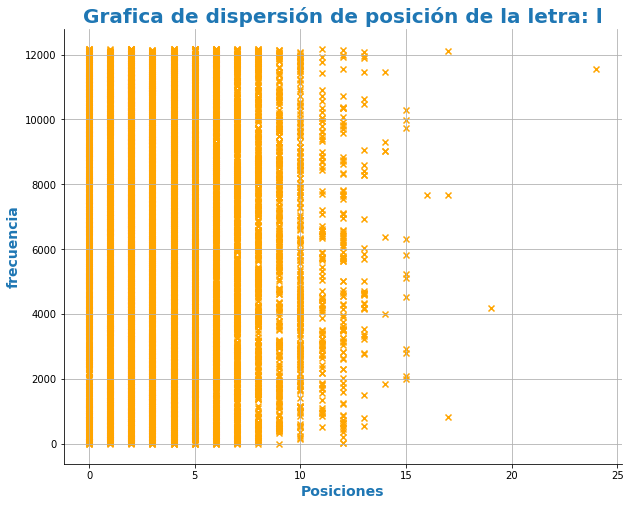

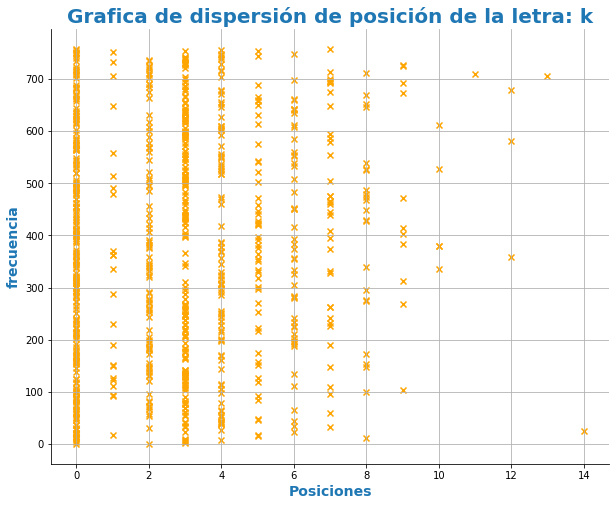

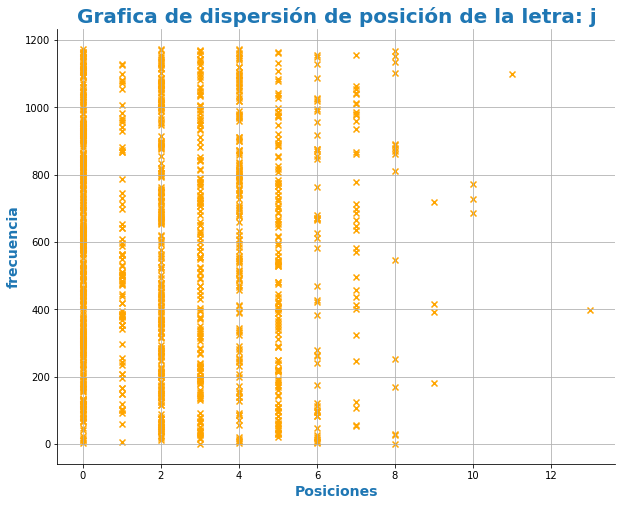

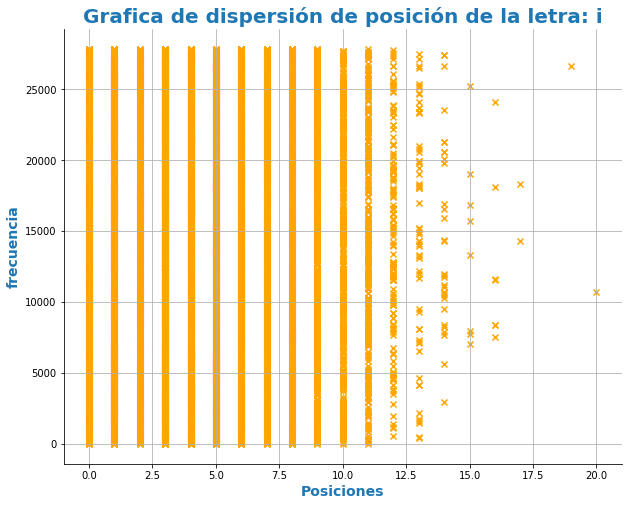

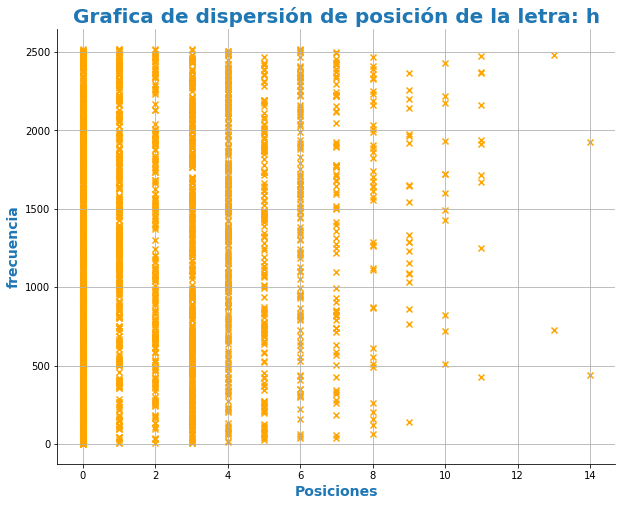

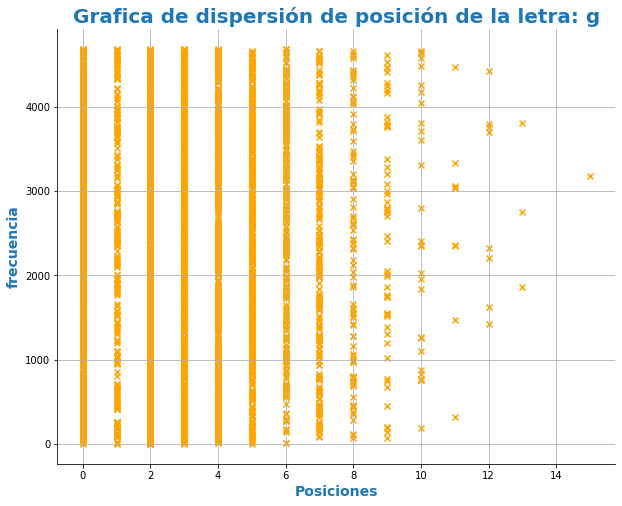

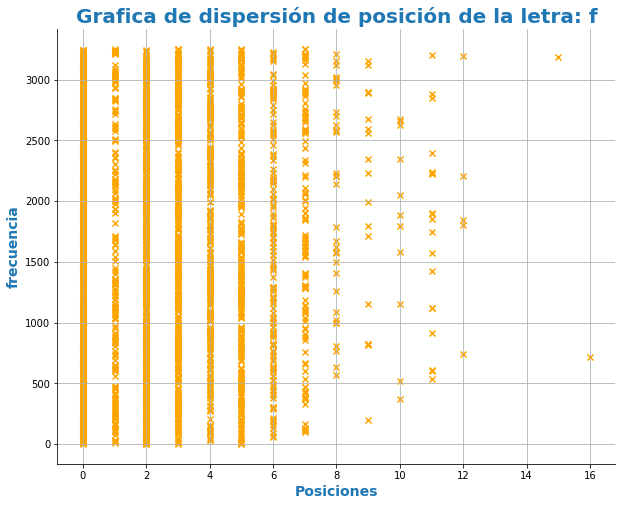

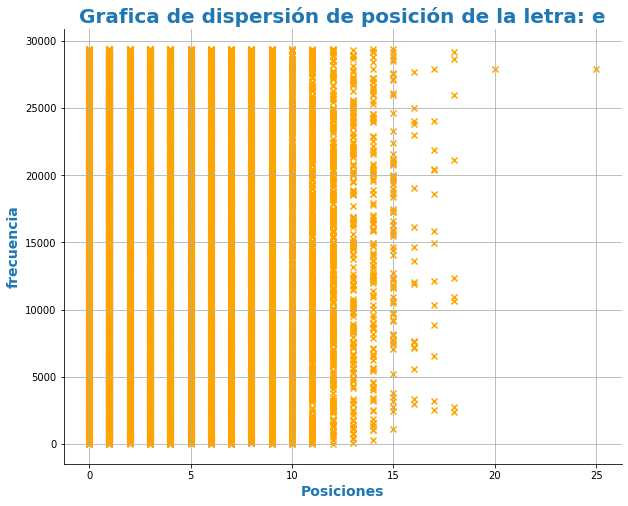

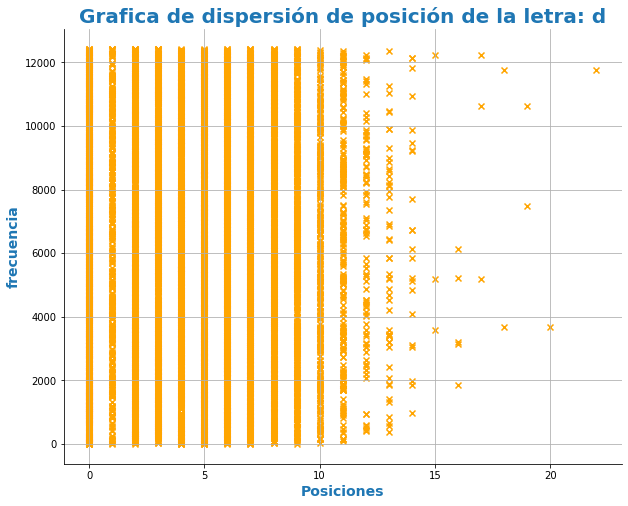

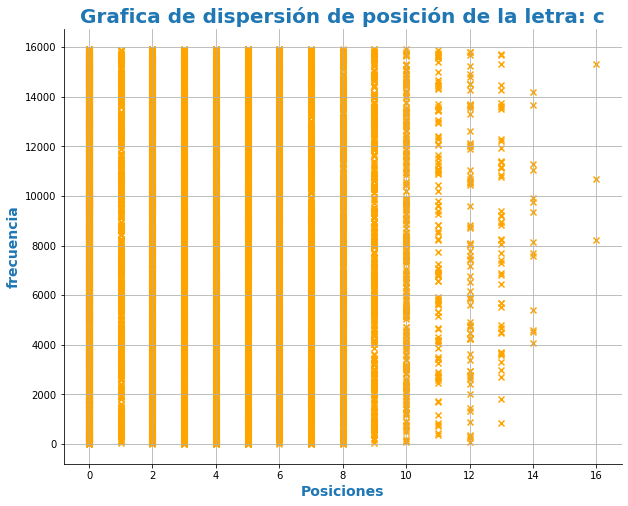

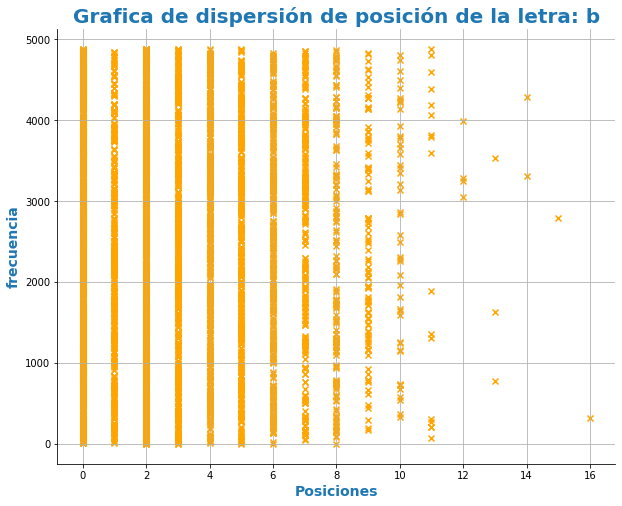

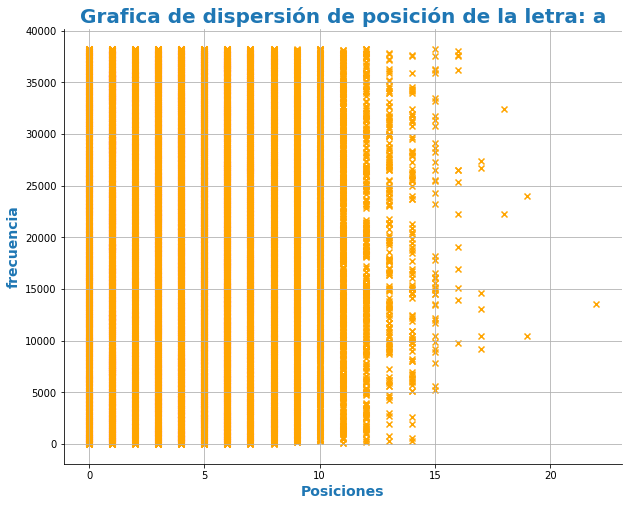

In [76]:
def grafic_disp(data,letters):
  for i in range(len(data)):
    fig, ax = plt.subplots(figsize = (10,8))
    sns.despine(fig)
    ax.scatter(data[i],range(len(data[i])),marker = "x",color = "orange")
    ax.set_title('Grafica de dispersión de posición de la letra: '+letters[i], loc = "center", fontdict = {'fontsize':20, 'fontweight':'bold', 'color':'tab:blue'})
    ax.grid()
    #ax.set_xticks(range(0,27,1))
    #ax.set_yticks(range(0,35500,2000))
    ax.set_xlabel("Posiciones", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    ax.set_ylabel("frecuencia", fontdict = {'fontsize':14, 'fontweight':'bold', 'color':'tab:blue'})
    plt.show()
grafic_disp(matriz_pos,letters_abc)

## 9. Introducción a las pruebas de hipótesis:
* H0 = Determinar si existe significancia estadística entre las posiciones en las que están las vocales y consonantes ubicadas en las palabras
* H1 = no  existe significancia estadística entre las posiciones en las que están las vocales y consonantes ubicadas en las palabras

como los valores de p son menosres al nivel de significacia 5% se rechaza la hipotesis nula.
segun lo obtenido se tiene la suficiente evidencia estadistica para para decir que no  existe significancia estadística entre las posiciones en las que están las vocales y consonantes ubicadas en las palabras

In [77]:
#test de kolmogoro smirnoff
def hypo_testing(data,letters): 
  for i in range(len(data)):
    result = stats.ks_2samp(df["tamaño"],matriz_pos[i])
    print("resultado de la letra: "+letters[i],result)
hypo_testing(matriz_pos,letters_abc)

resultado de la letra: ñ Ks_2sampResult(statistic=0.6813783218299527, pvalue=9.48354558284573e-123)
resultado de la letra: z Ks_2sampResult(statistic=0.49503909967244286, pvalue=0.0)
resultado de la letra: y Ks_2sampResult(statistic=0.6401016278415081, pvalue=4.469323208115267e-297)
resultado de la letra: x Ks_2sampResult(statistic=0.8759524835354219, pvalue=0.0)
resultado de la letra: w Ks_2sampResult(statistic=0.8077180153009537, pvalue=6.858570715417388e-208)
resultado de la letra: v Ks_2sampResult(statistic=0.6890215253100596, pvalue=0.0)
resultado de la letra: u Ks_2sampResult(statistic=0.7533557499797843, pvalue=0.0)
resultado de la letra: t Ks_2sampResult(statistic=0.5707077616906682, pvalue=0.0)
resultado de la letra: s Ks_2sampResult(statistic=0.40892738282133834, pvalue=0.0)
resultado de la letra: r Ks_2sampResult(statistic=0.6285774008884905, pvalue=0.0)
resultado de la letra: q Ks_2sampResult(statistic=0.8159970774956785, pvalue=0.0)
resultado de la letra: p Ks_2sampResult(

## 10. Determinación de correlación entre variables:
* Determinar la correlación existente entre la longitud de las palabras y la cantidad de vocales contenidas en la misma.
* Determinar la correlación existente entre la longitud de las palabras y la cantidad de consonantes contenidas en la misma.

se concluyo que no se tiene una correlacion estadistica significativa entre las dos variables 

In [78]:
dataf = df["tamaño"]
print()
def correlation1(data,letters):
  for i,L in enumerate(data):
    if len(dataf) > len(data[i]):
      result = stats.pearsonr(dataf[:len(data[i])],data[i])
      print("resultado de la letra: "+letters[i]," coeficiente de correlacion",result[0]," p: ",result[1])
    else:
      result = stats.pearsonr(dataf,L[:len(dataf)])
      print("resultado de la letra: "+letters[i]," coeficiente de correlacion",result[0]," p: ",result[1])

def correlation2(data,letters):
  for i,L in enumerate(data):
    if len(dataf) > len(data[i]):
      result = np.corrcoef(dataf[:len(data[i])],data[i])[0,1]
      print("resultado de la letra: "+letters[i]," coeficiente de correlacion",result)
    else:
      result = np.corrcoef(dataf,L[:len(dataf)])[0,1]
      print("resultado de la letra: "+letters[i]," coeficiente de correlacion",result)
correlation1(matriz_pos,letters_abc)
print("----------------------------------------------------------------------")
correlation2(matriz_pos,letters_abc)


resultado de la letra: ñ  coeficiente de correlacion 0.012449947213360532  p:  0.8282845513168096
resultado de la letra: z  coeficiente de correlacion -0.0013621360346651866  p:  0.9550220879022892
resultado de la letra: y  coeficiente de correlacion -0.07364390212997937  p:  0.03140628370892811
resultado de la letra: x  coeficiente de correlacion -0.01585100590262401  p:  0.6605451851236115
resultado de la letra: w  coeficiente de correlacion 0.01218135970154274  p:  0.8153506799353837
resultado de la letra: v  coeficiente de correlacion 0.005778311517169683  p:  0.7290145901197563
resultado de la letra: u  coeficiente de correlacion 0.018359534954160258  p:  0.08976520886836144
resultado de la letra: t  coeficiente de correlacion -0.0037520296209857897  p:  0.6351302304291749
resultado de la letra: s  coeficiente de correlacion -0.0027302520485569413  p:  0.6936964147137877
resultado de la letra: r  coeficiente de correlacion 0.010078964769143994  p:  0.1290813338748139
resultado de

In [79]:
df_pos = pd.DataFrame(matriz_pos).transpose() # se toma los datos y se rotan
#df_pos.columns(letters_abc)
df_pos.columns = letters_abc
df_pos
print(df_pos["ñ"])

0        5.0
1        4.0
2        5.0
3        4.0
4        5.0
        ... 
38266    NaN
38267    NaN
38268    NaN
38269    NaN
38270    NaN
Name: ñ, Length: 38271, dtype: float64


# codigos de prueba 

In [80]:
string = "HOLA soy GERMAN1 DanIel 123 ta Pingüinos pâä"
print(re.findall(r"\w*[A-Z]\w*[A-Z]\w*",string))
sim = delate_words_accents(string.split(" "),other_simbol)
sim

['HOLA', 'GERMAN1', 'DanIel']
canditdad de palabras eliminadas:  2


'HOLA soy GERMAN1 DanIel 123 ta'

In [81]:
def unique_list(text):
    ulist = []
    [ulist.append(word) for word in text if word not in ulist]
    return ' '.join(ulist)

a="calvin klein design dress calvin klein"
a=unique_list(a.split())
print(a)

calvin klein design dress


In [82]:
stop_words = ["las","los","el","del"]
stop_words_cap = []

for word in stop_words:
  stop_words_cap.append(word.capitalize())
print(stop_words_cap)
stop_words = stop_words + stop_words_cap
print(stop_words)

['Las', 'Los', 'El', 'Del']
['las', 'los', 'el', 'del', 'Las', 'Los', 'El', 'Del']


Medidas de tendencia central:
* Determinar la media, moda y mediana de las longitudes de caracteres de las palabras disponibles. Adicionalmente puede realizar análisis de tendencia central en otras variables si lo desea.

In [83]:
# se abre el arcihivo
with open("/content/drive/MyDrive/reto/raw_texts/Aeropuerto.txt","r") as raw_file:
  aeropuerto = raw_file.read()
print(len(re.split(" ",aeropuerto)))
#param = [r"\d",r"\n",r"\u200b",r"\[",r"\]",r"\(",r"\)",r"\{",r"\}",r"\.",r":"]
new_reemplace_string = re.sub(r"\d","",aeropuerto)
new_reemplace_string = re.sub(r"\n"," ",new_reemplace_string)
new_reemplace_string = re.sub(r"\u200b"," ",new_reemplace_string)
new_reemplace_string = re.sub(r"\["," ",new_reemplace_string)
new_reemplace_string = re.sub(r"]"," ",new_reemplace_string)
new_reemplace_string = re.sub(r":"," ",new_reemplace_string)
new_reemplace_string = re.sub(r"\."," ",new_reemplace_string)
new_reemplace_string = re.sub(r"\{"," ",new_reemplace_string)
new_reemplace_string = re.sub(r"}"," ",new_reemplace_string)
new_reemplace_string = re.sub(r"\("," ",new_reemplace_string)
new_reemplace_string = re.sub(r"\)"," ",new_reemplace_string)
new_reemplace_string = re.sub(r"\'"," ",new_reemplace_string)
print(len(re.split(" ",aeropuerto)))
new_reemplace_string = re.sub(r"\w*[A-Z]\w*[A-Z]\w*"," ",new_reemplace_string)
print(len(re.split(" ",aeropuerto)))
new_reemplace_string

3061
3061
3061


'Un aeropuerto es un aeródromo con terminal para el viaje de transporte aéreo en aeronave  Las funciones del aeropuerto son variadas, entre ellas el aterrizaje y despegue de aeronaves, embarque y desembarque de pasajeros, equipaje y mercancía, reabastecimiento de combustible y mantenimiento de aeronaves, así como lugar de estacionamiento para aquellas que no están en servicio  Los aeropuertos sirven para aviación militar, comercial o general      Los aeropuertos se dividen en dos partes   Un aeródromo es un área definida de tierra que incluye todas sus edificaciones, instalaciones y equipos  destinado total o parcialmente a la llegada, partida o movimiento de aeronaves  Son aeropuertos aquellos aeródromos públicos que cuentan con servicios o intensidad de movimiento aéreo que justifiquen tal denominación  Aquellos aeródromos con vuelos provenientes del o con destino al extranjero, donde se presten servicios de sanidad, aduana, migraciones y otros, se denominan aeródromos o aeropuertos 